In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\Admin\Desktop\Clustering\EastWestAirlines.xlsx", sheet_name = 'data',index_col=0)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

In [3]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [6]:
df.duplicated()

ID#
1       False
2       False
3       False
4       False
5       False
        ...  
4017    False
4018    False
4019    False
4020    False
4021    False
Length: 3999, dtype: bool

In [7]:
df.duplicated().sum()

1

In [8]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

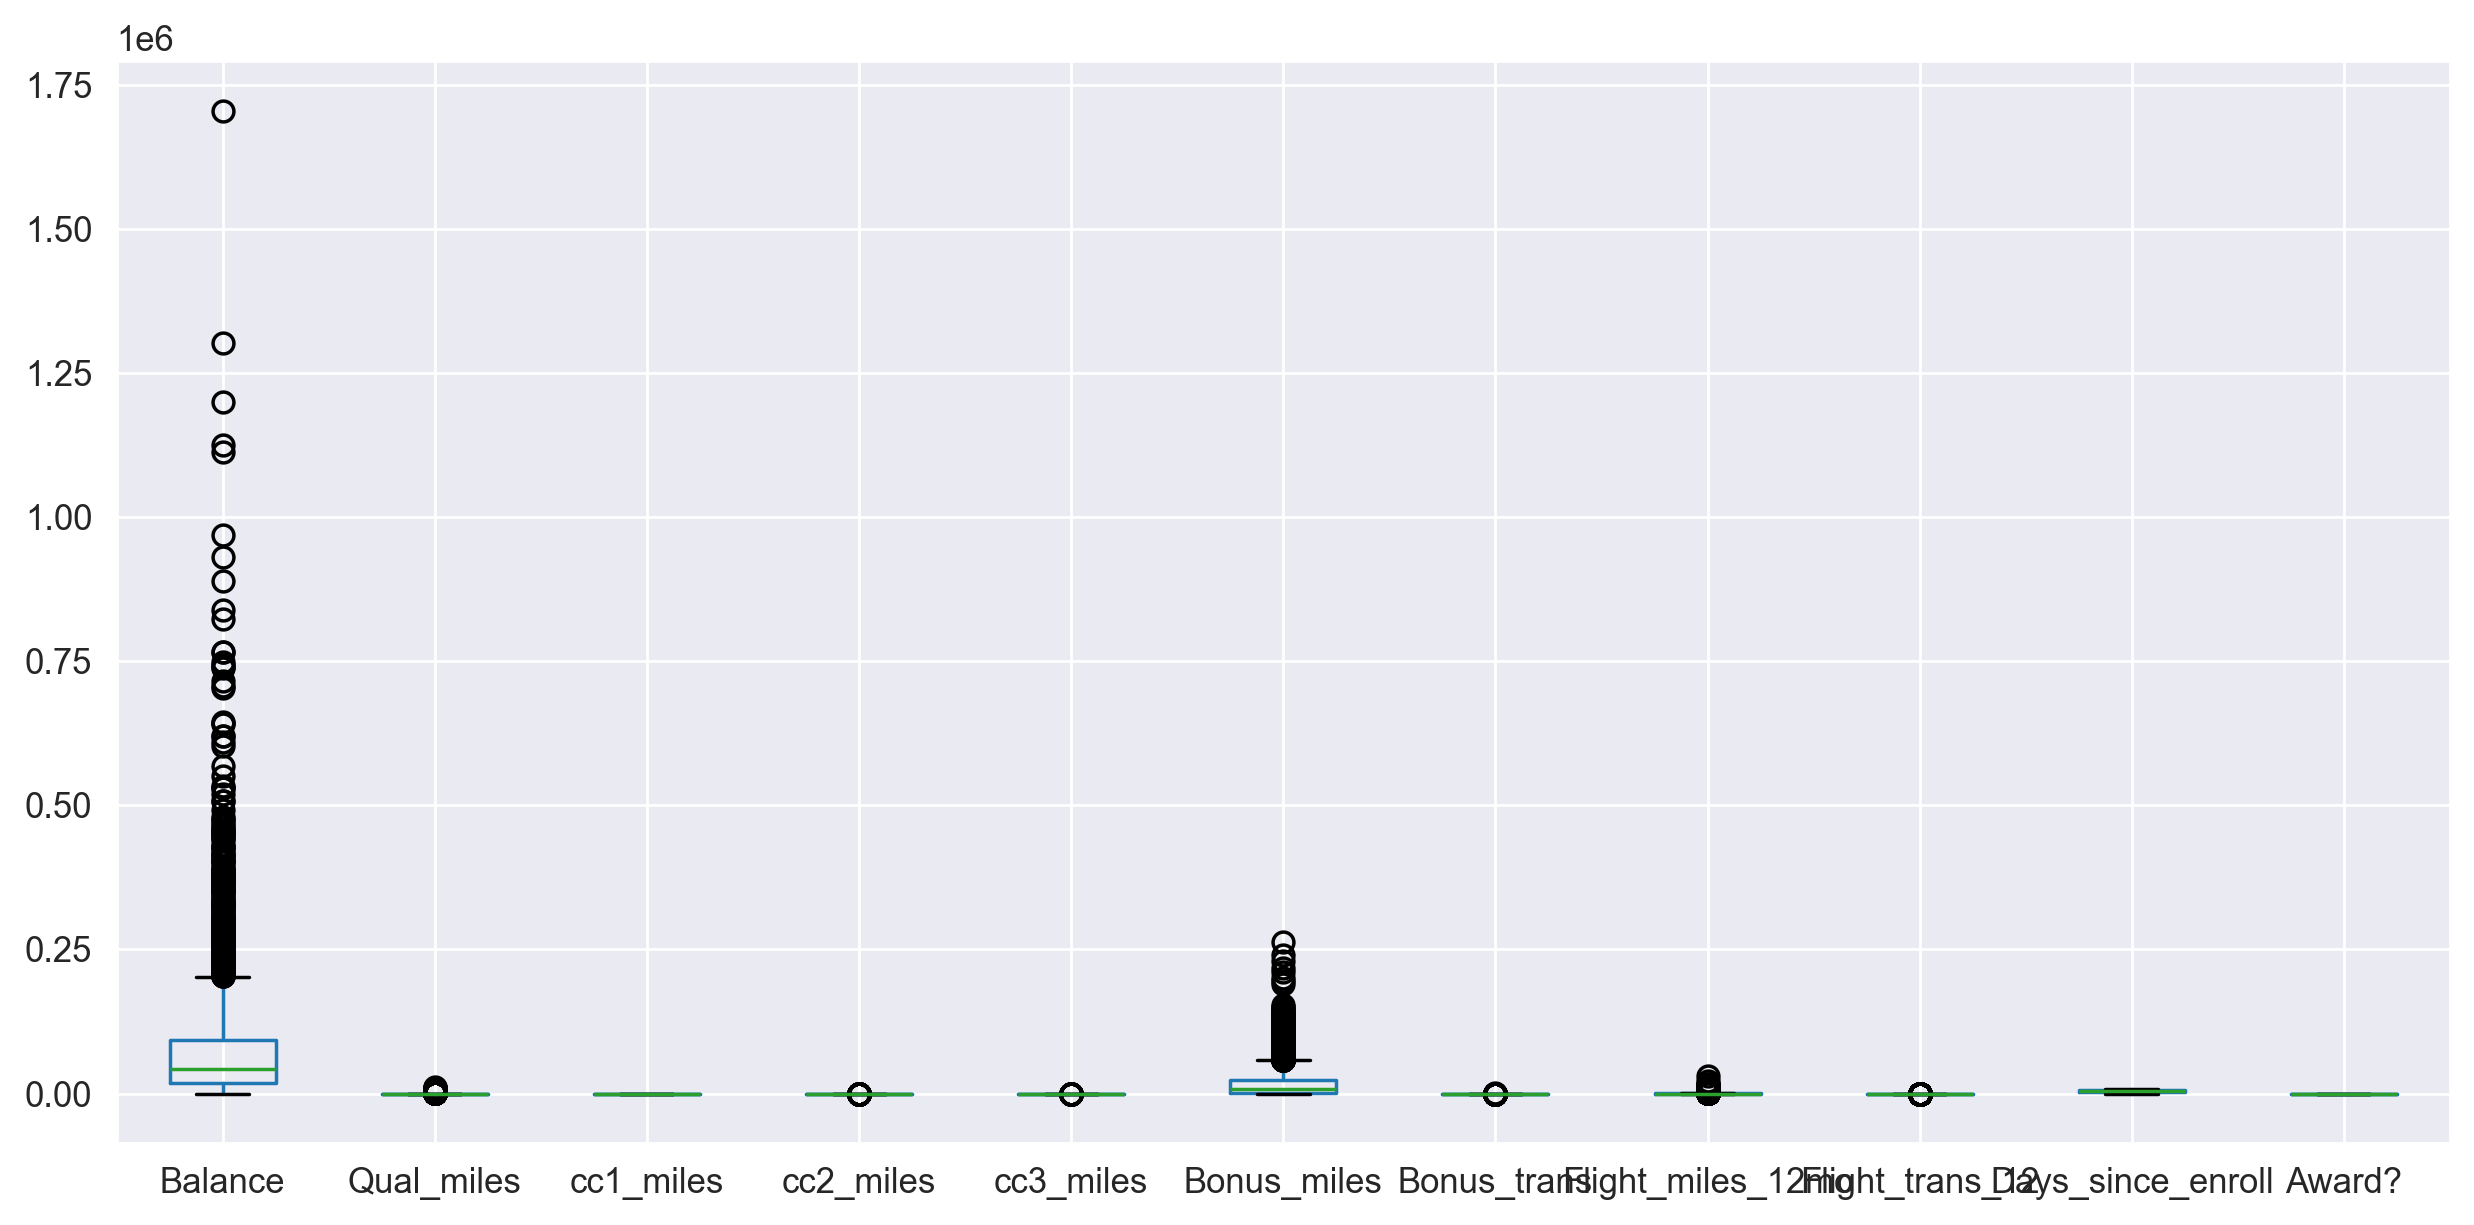

In [9]:
df.boxplot()
plt.tight_layout()

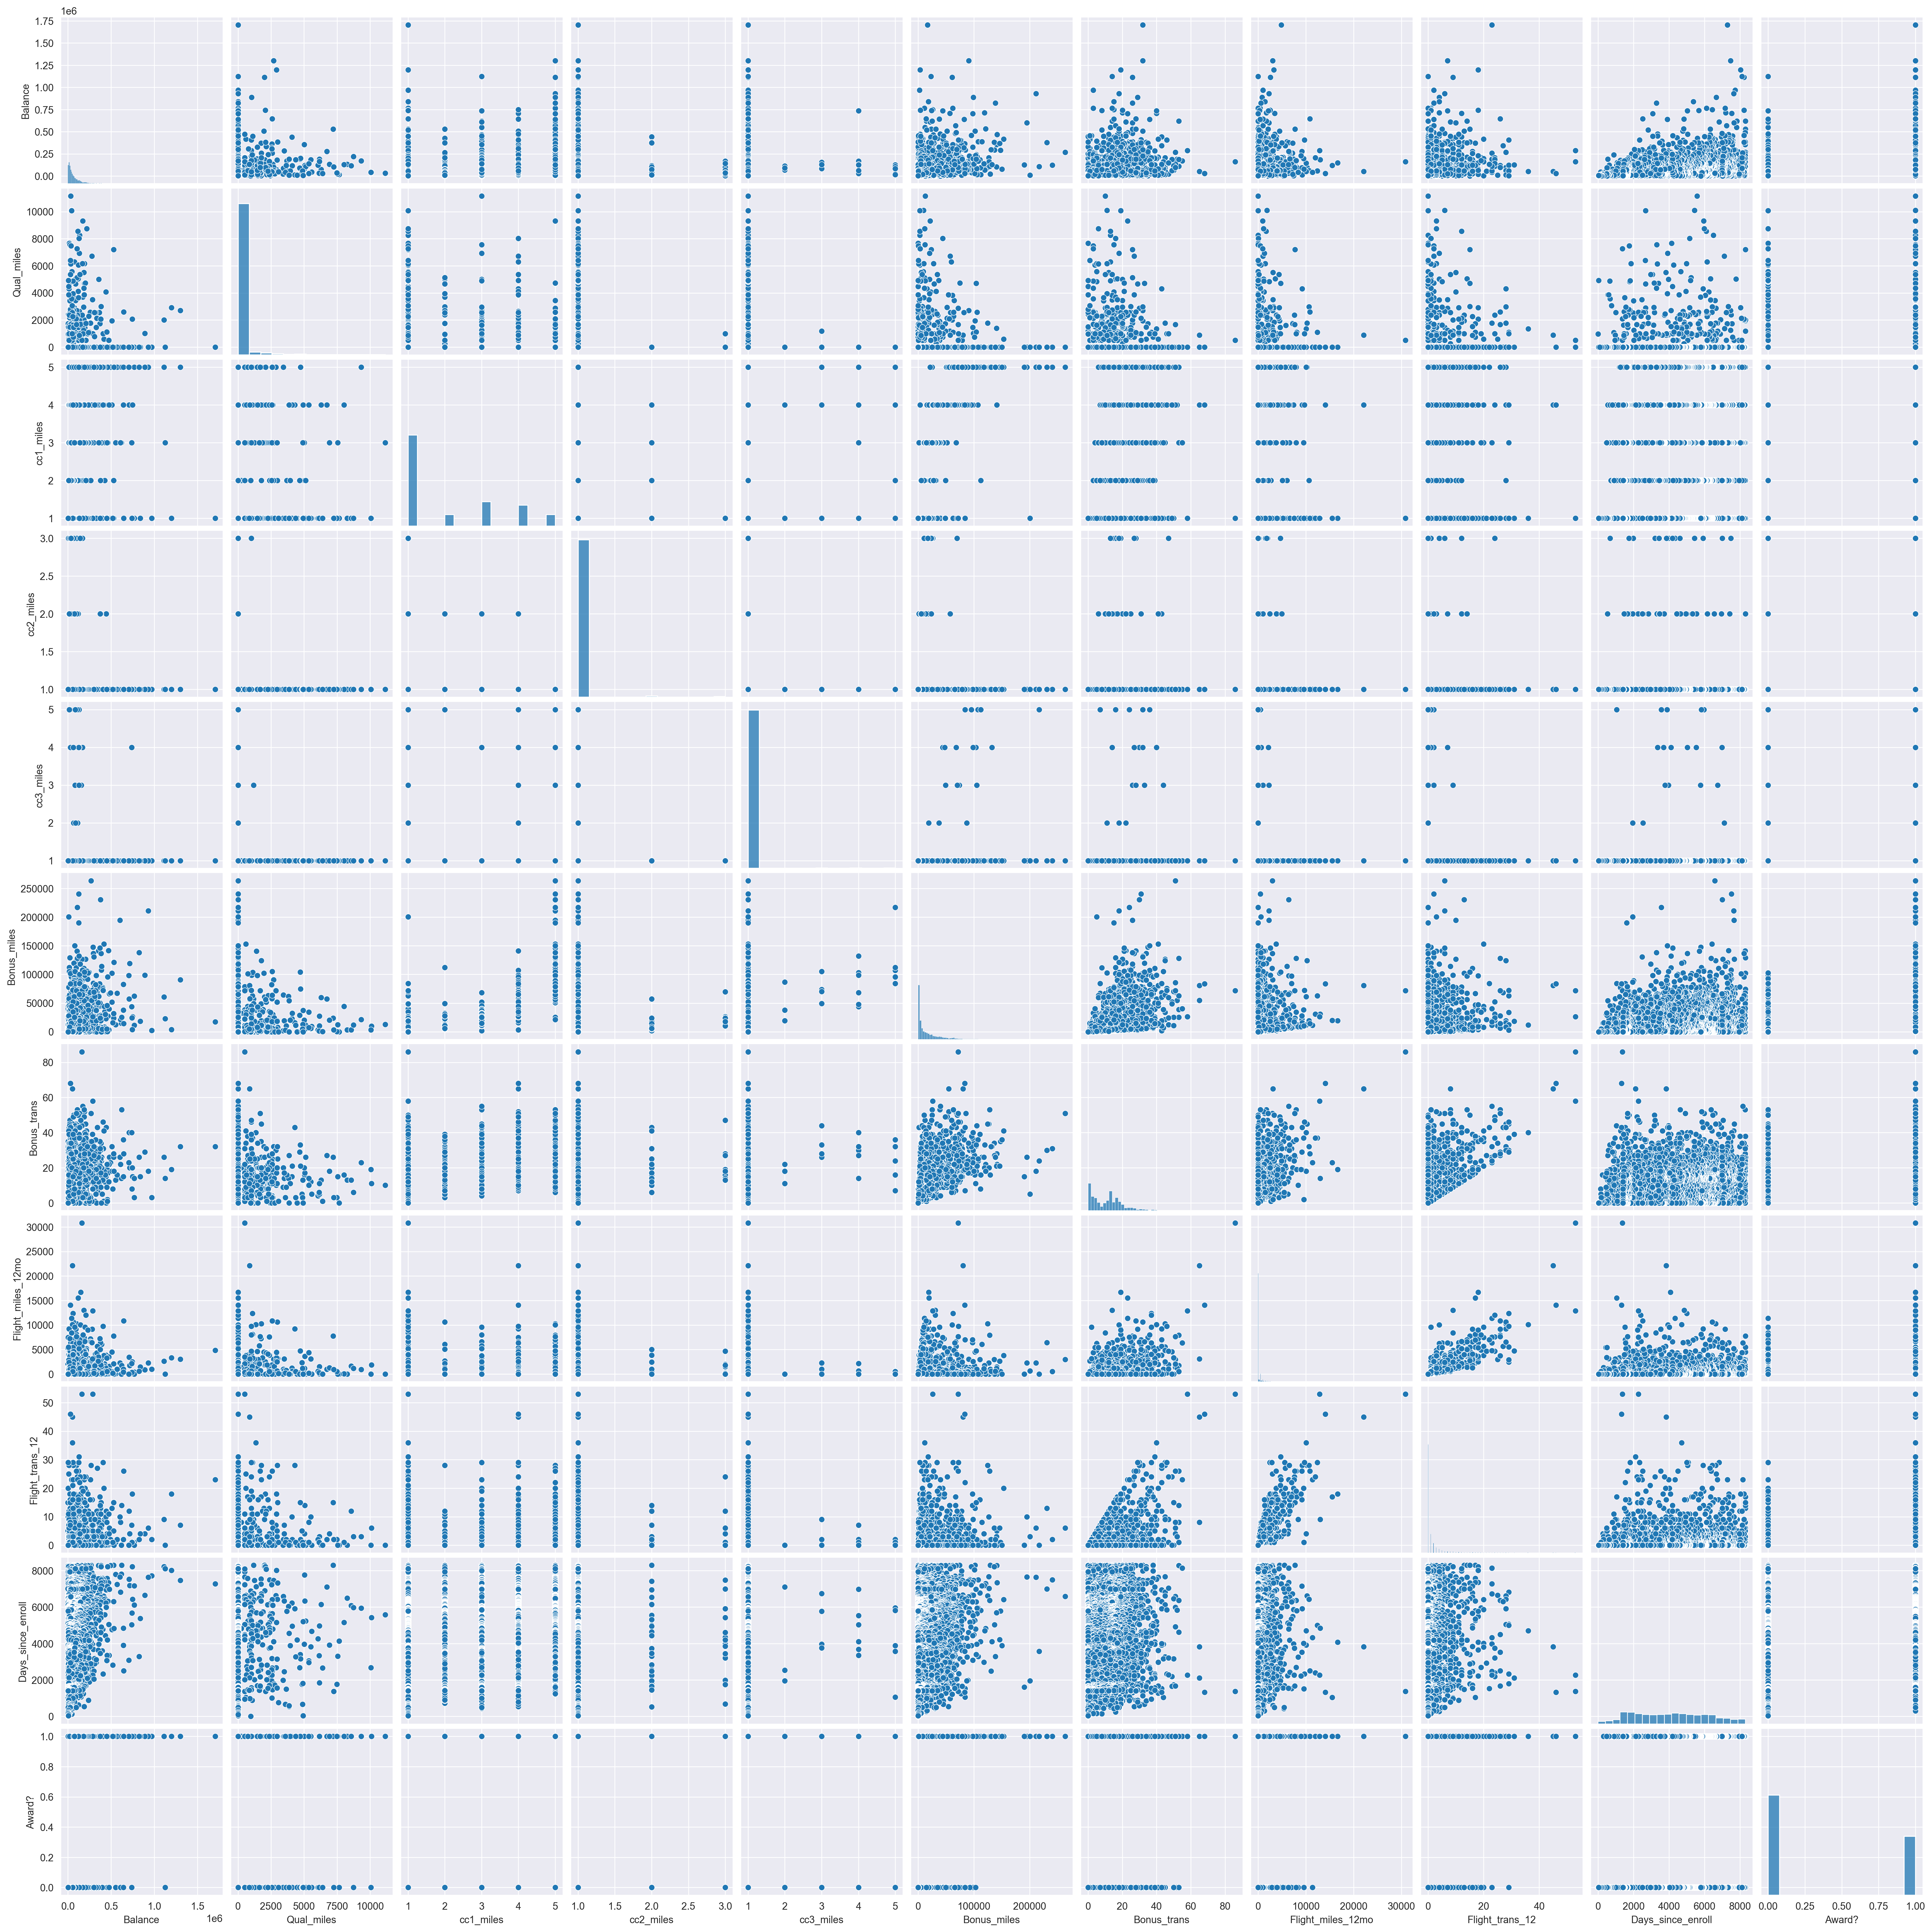

In [10]:
sns.pairplot(df)

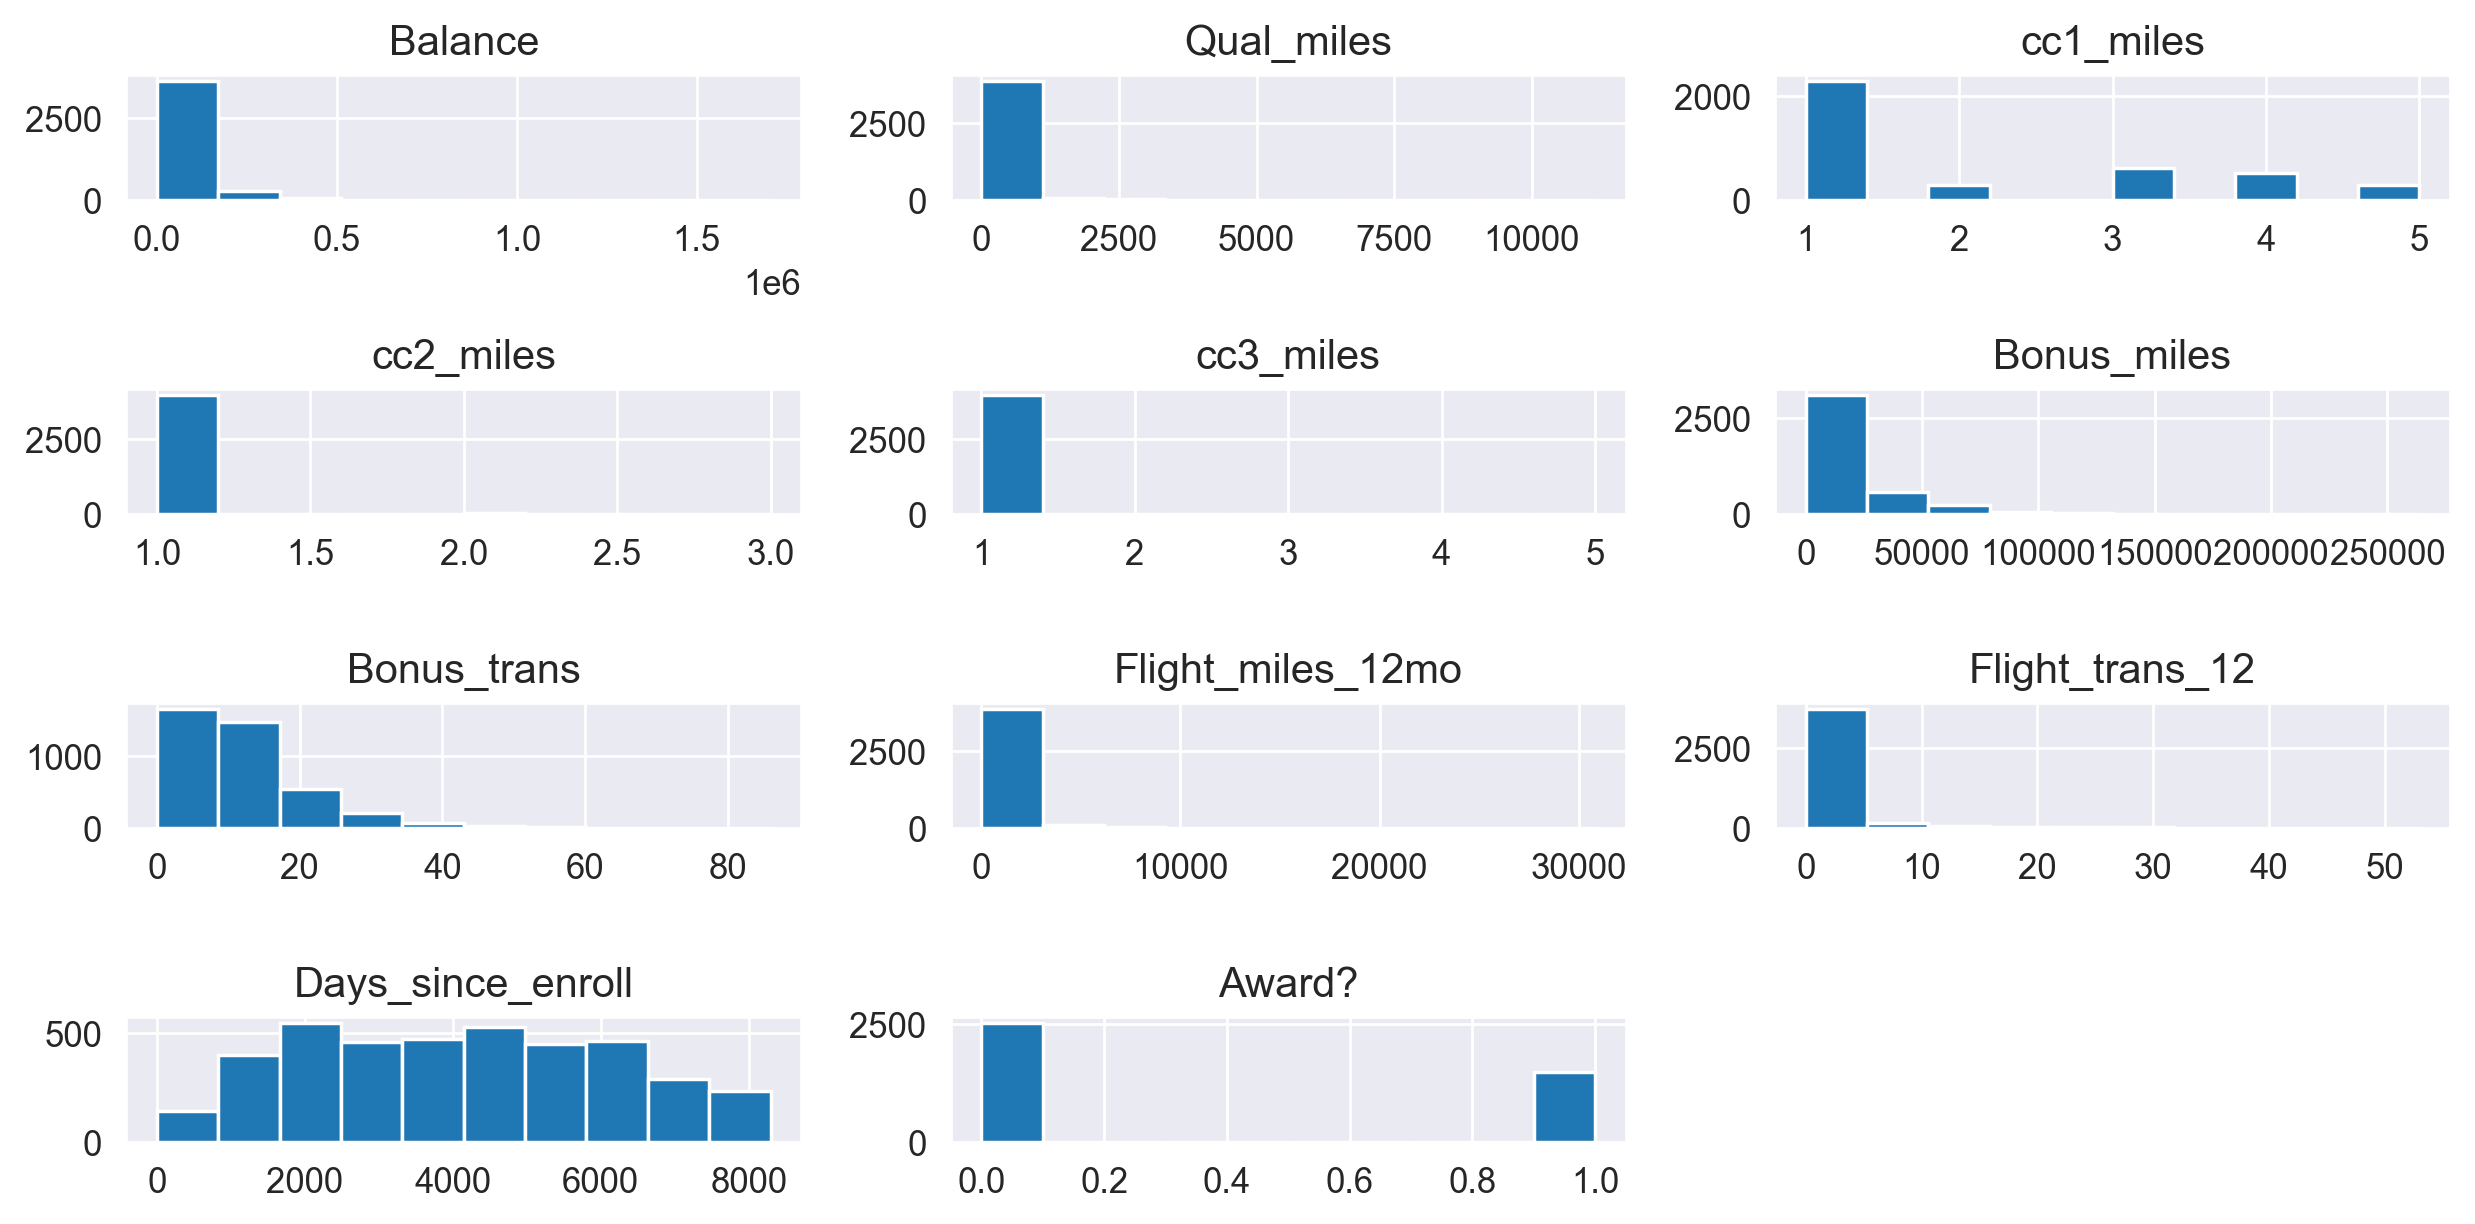

In [11]:
df.hist()
plt.tight_layout()

<Axes: xlabel='Qual_miles', ylabel='Flight_trans_12'>

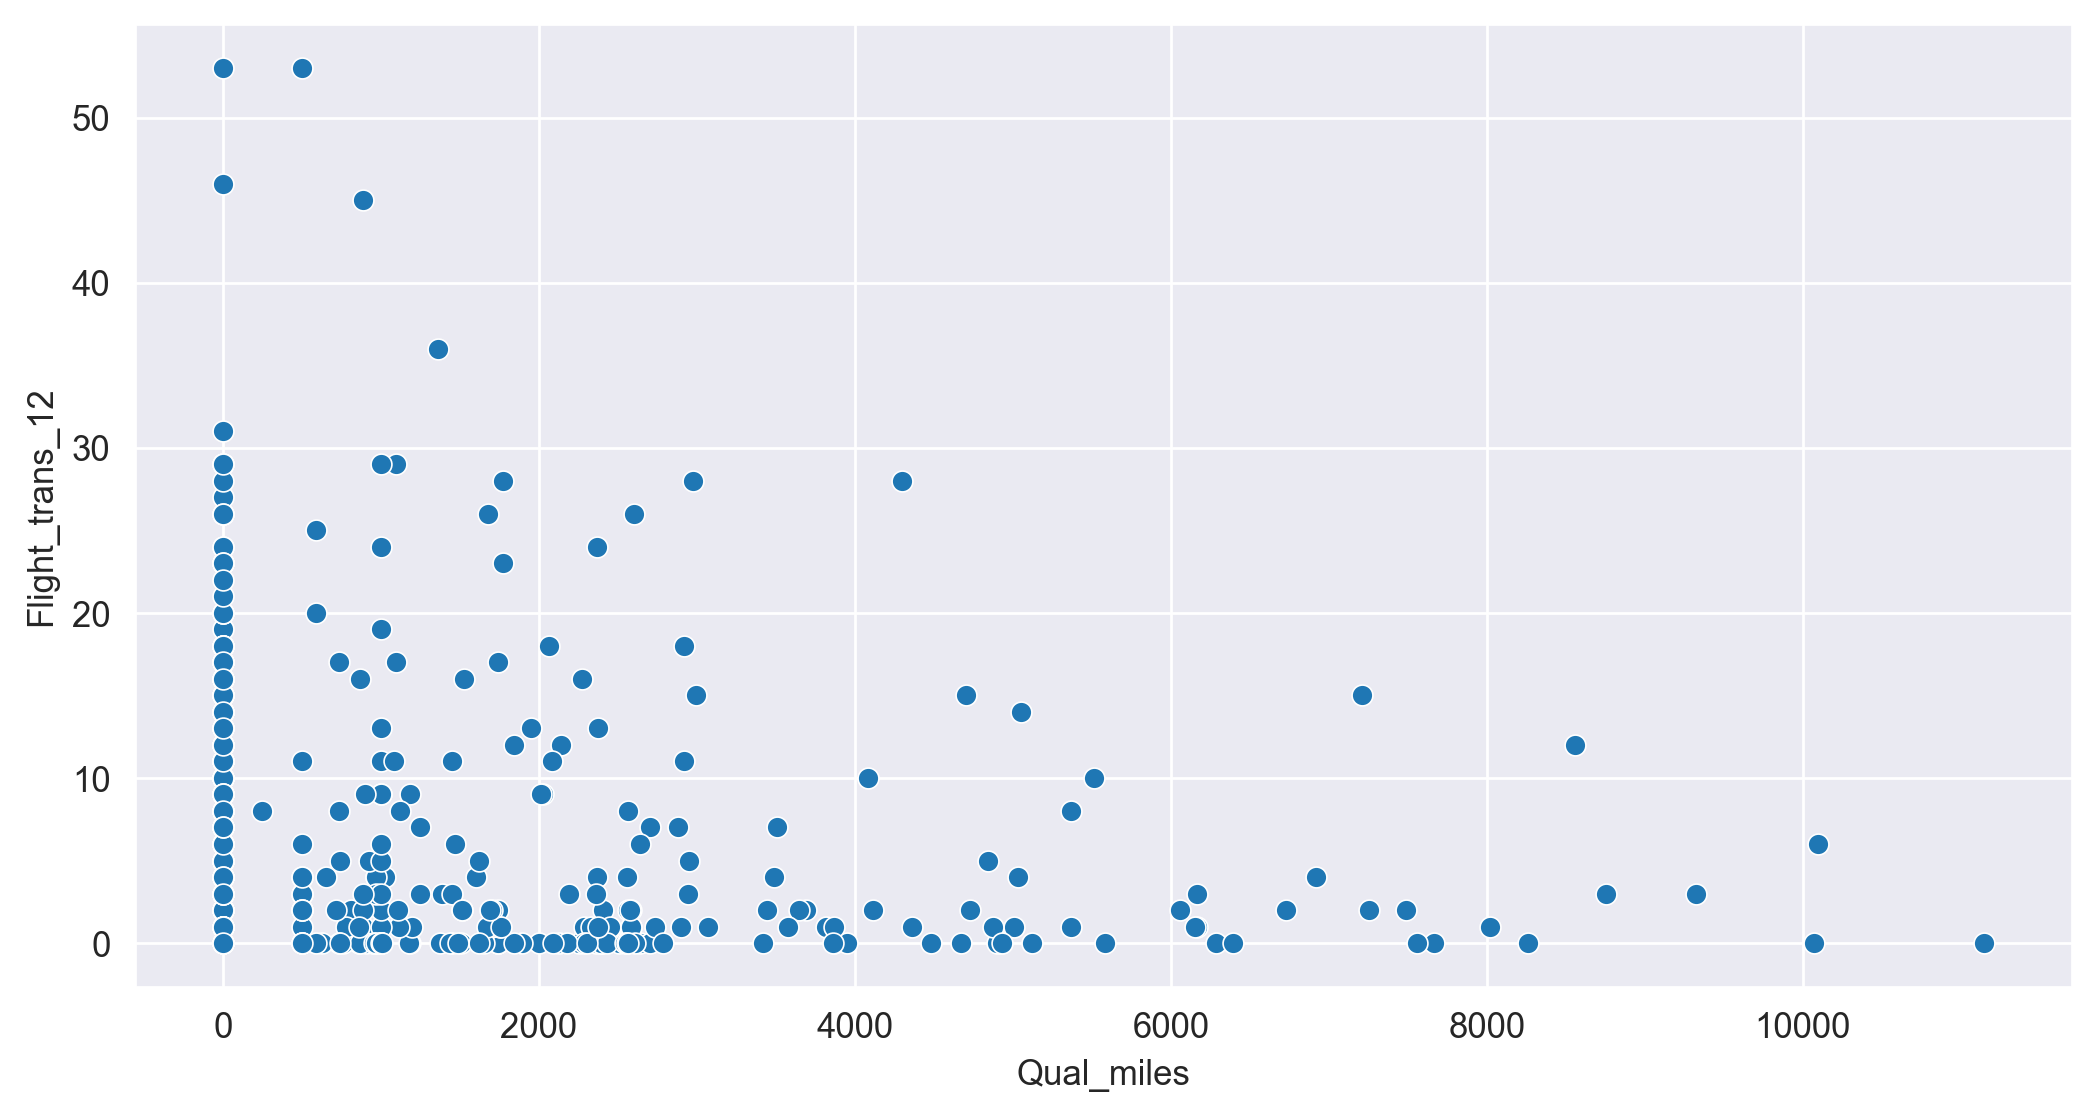

In [12]:
sns.scatterplot(x = df['Qual_miles'], y = df['Flight_trans_12'])

# Hierarchical Clustering

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  5.02236583e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01,  5.02236583e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01,  5.02236583e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.22323085e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  5.02236583e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  5.02236583e-01]])

In [49]:
from scipy.cluster import hierarchy

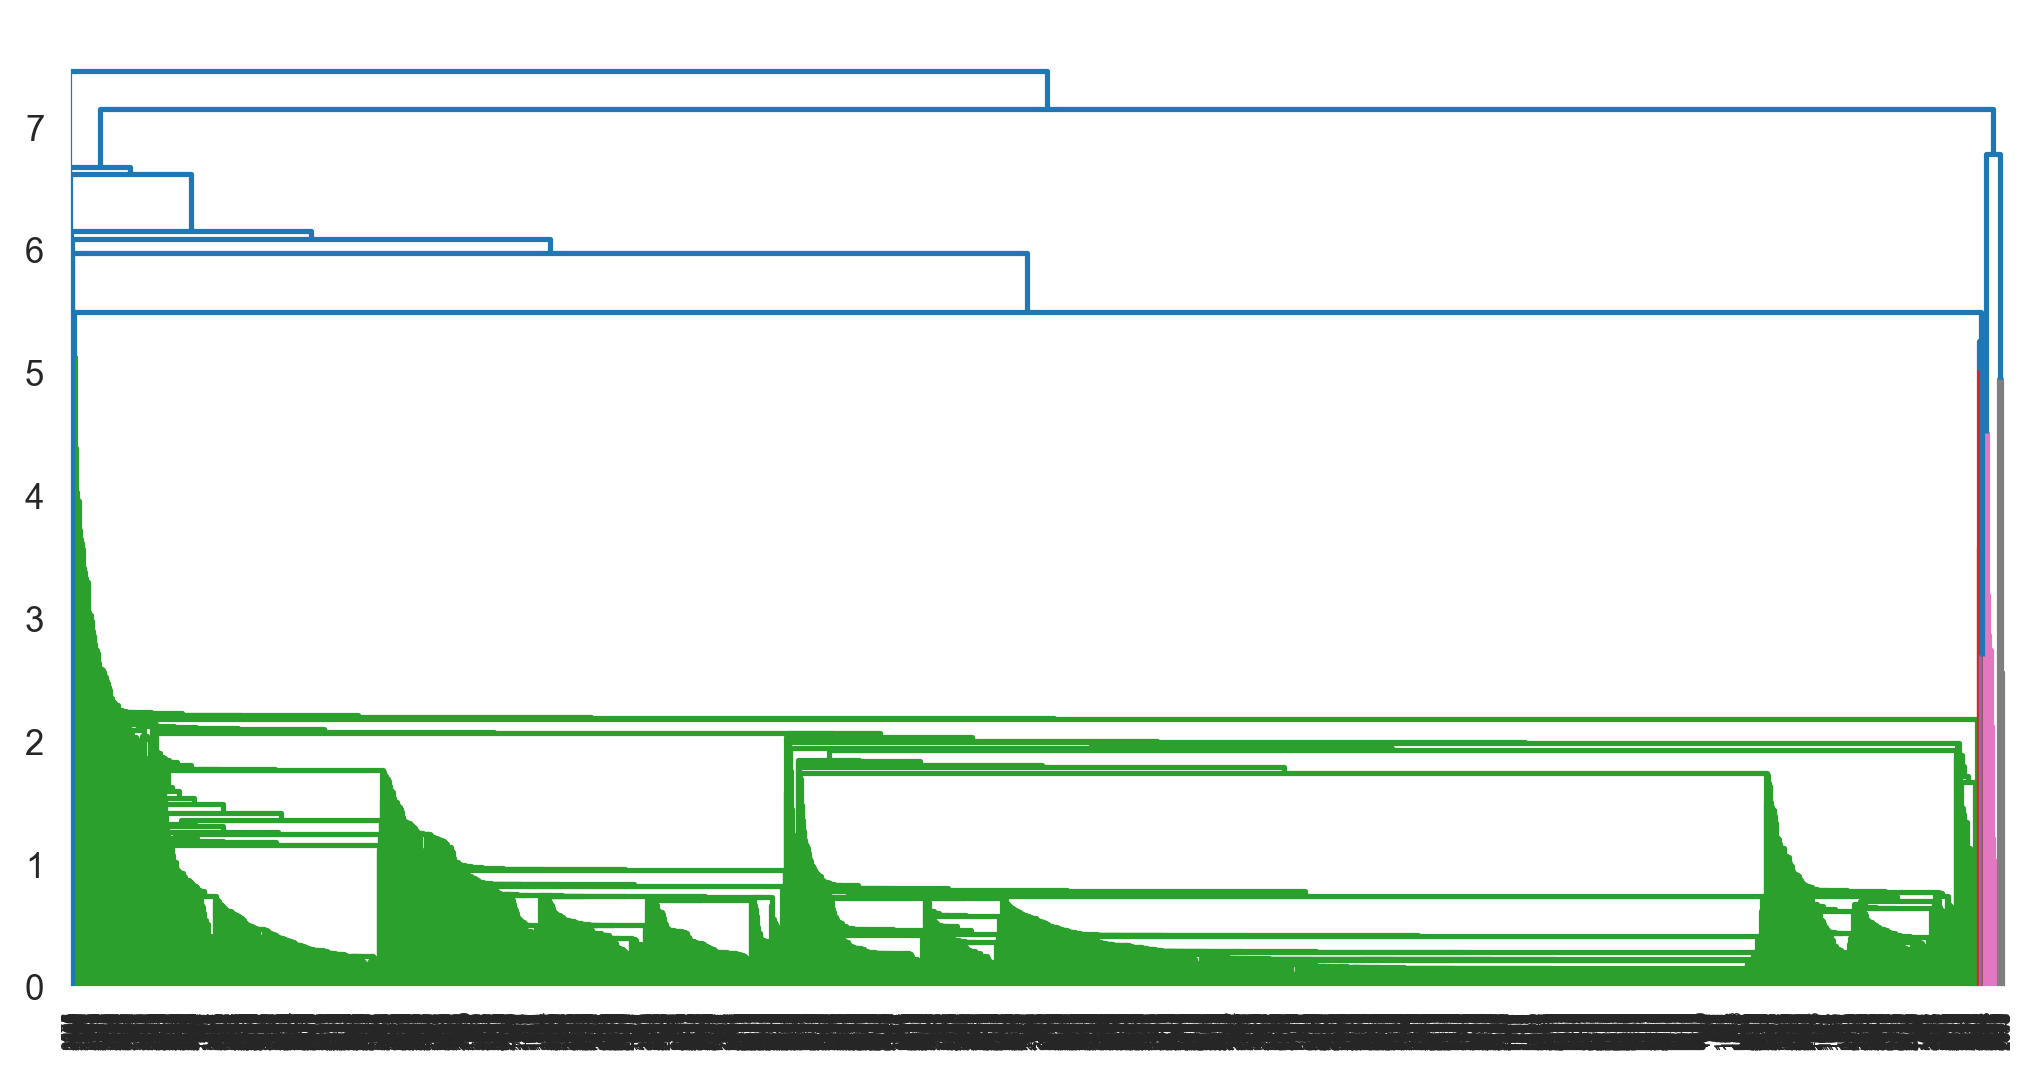

In [50]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

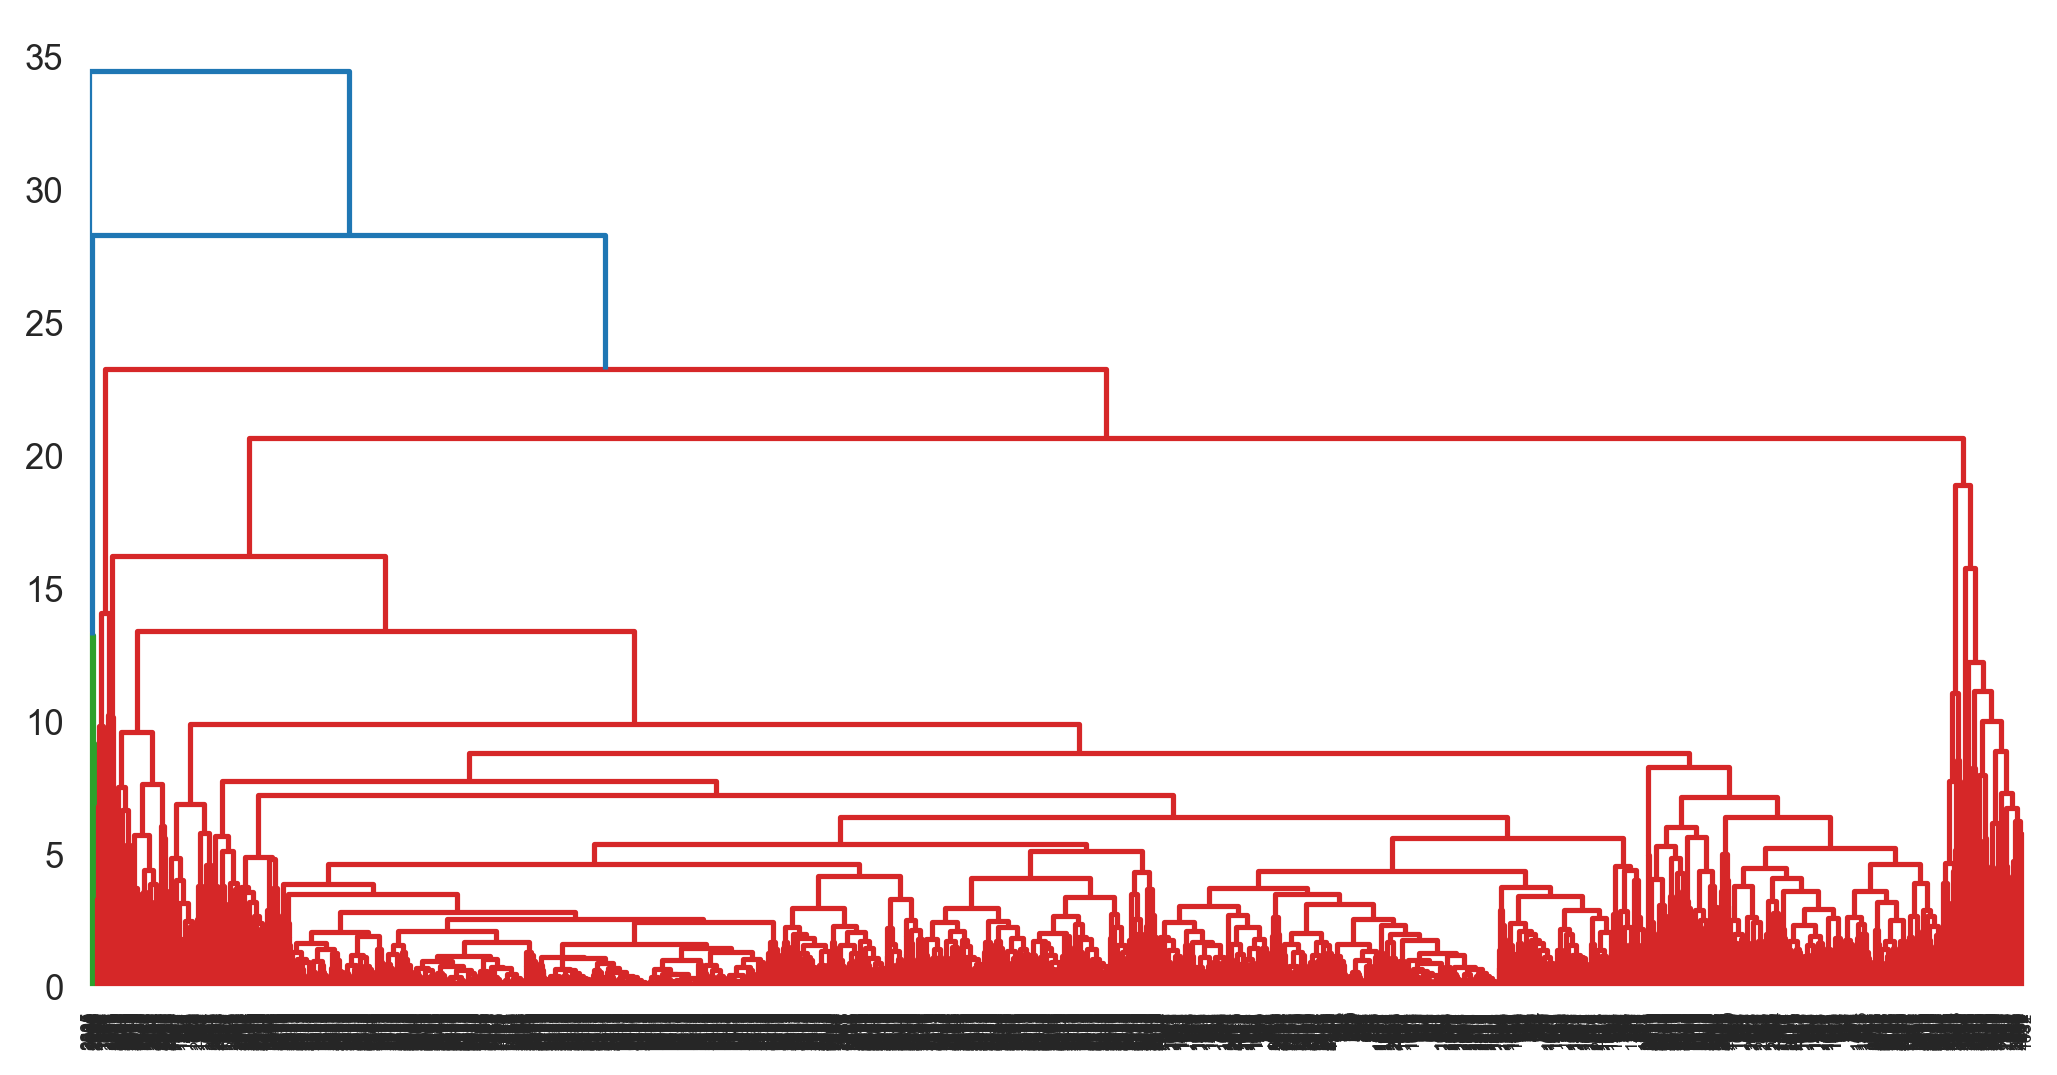

In [17]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [51]:
from sklearn.cluster import AgglomerativeClustering  #model building

In [19]:
hc = AgglomerativeClustering(n_clusters=2)

ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [20]:
df['cluster'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  cluster  
ID#                    
1          0        1  
2          0        1  
3          0        1  
4          0        1  
5          1        0  
...      ...      ...  
4017       1        1  
4018       1        1  
4019       1        0  
4020       0        1  
4021       0        1  

[3999 rows x 12 columns]

In [21]:
df[df['cluster'] == 1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
6       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
4016     3974           0          1          1          1          365   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
6               0                  0                0               6942   
...           ...                ...              ...                ...   
4016            3                  0                0               1397   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  cluster  
ID#                    
1          0        1  
2          0        1  
3          0        1  
4          0        1  
6          0        1  
...      ...      ...  
4016       0        1  
4017       1        1  
4018       1        1  
4020       0        1  
4021       0        1  

[2489 rows x 12 columns]

In [22]:
df.groupby('cluster').agg('mean')     #analysing cluster

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
0        117912.886093  366.377483   3.406623   1.000000    1.03245   
1         46718.863399    9.274407   1.242266   1.023303    1.00000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
0        37101.439735    19.037086         853.826490         2.483444   
1         5037.792688     7.091201         221.167135         0.700281   

         Days_since_enroll    Award?  
cluster                               
0              4688.513245  0.670861  
1              3772.785858  0.188027

<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

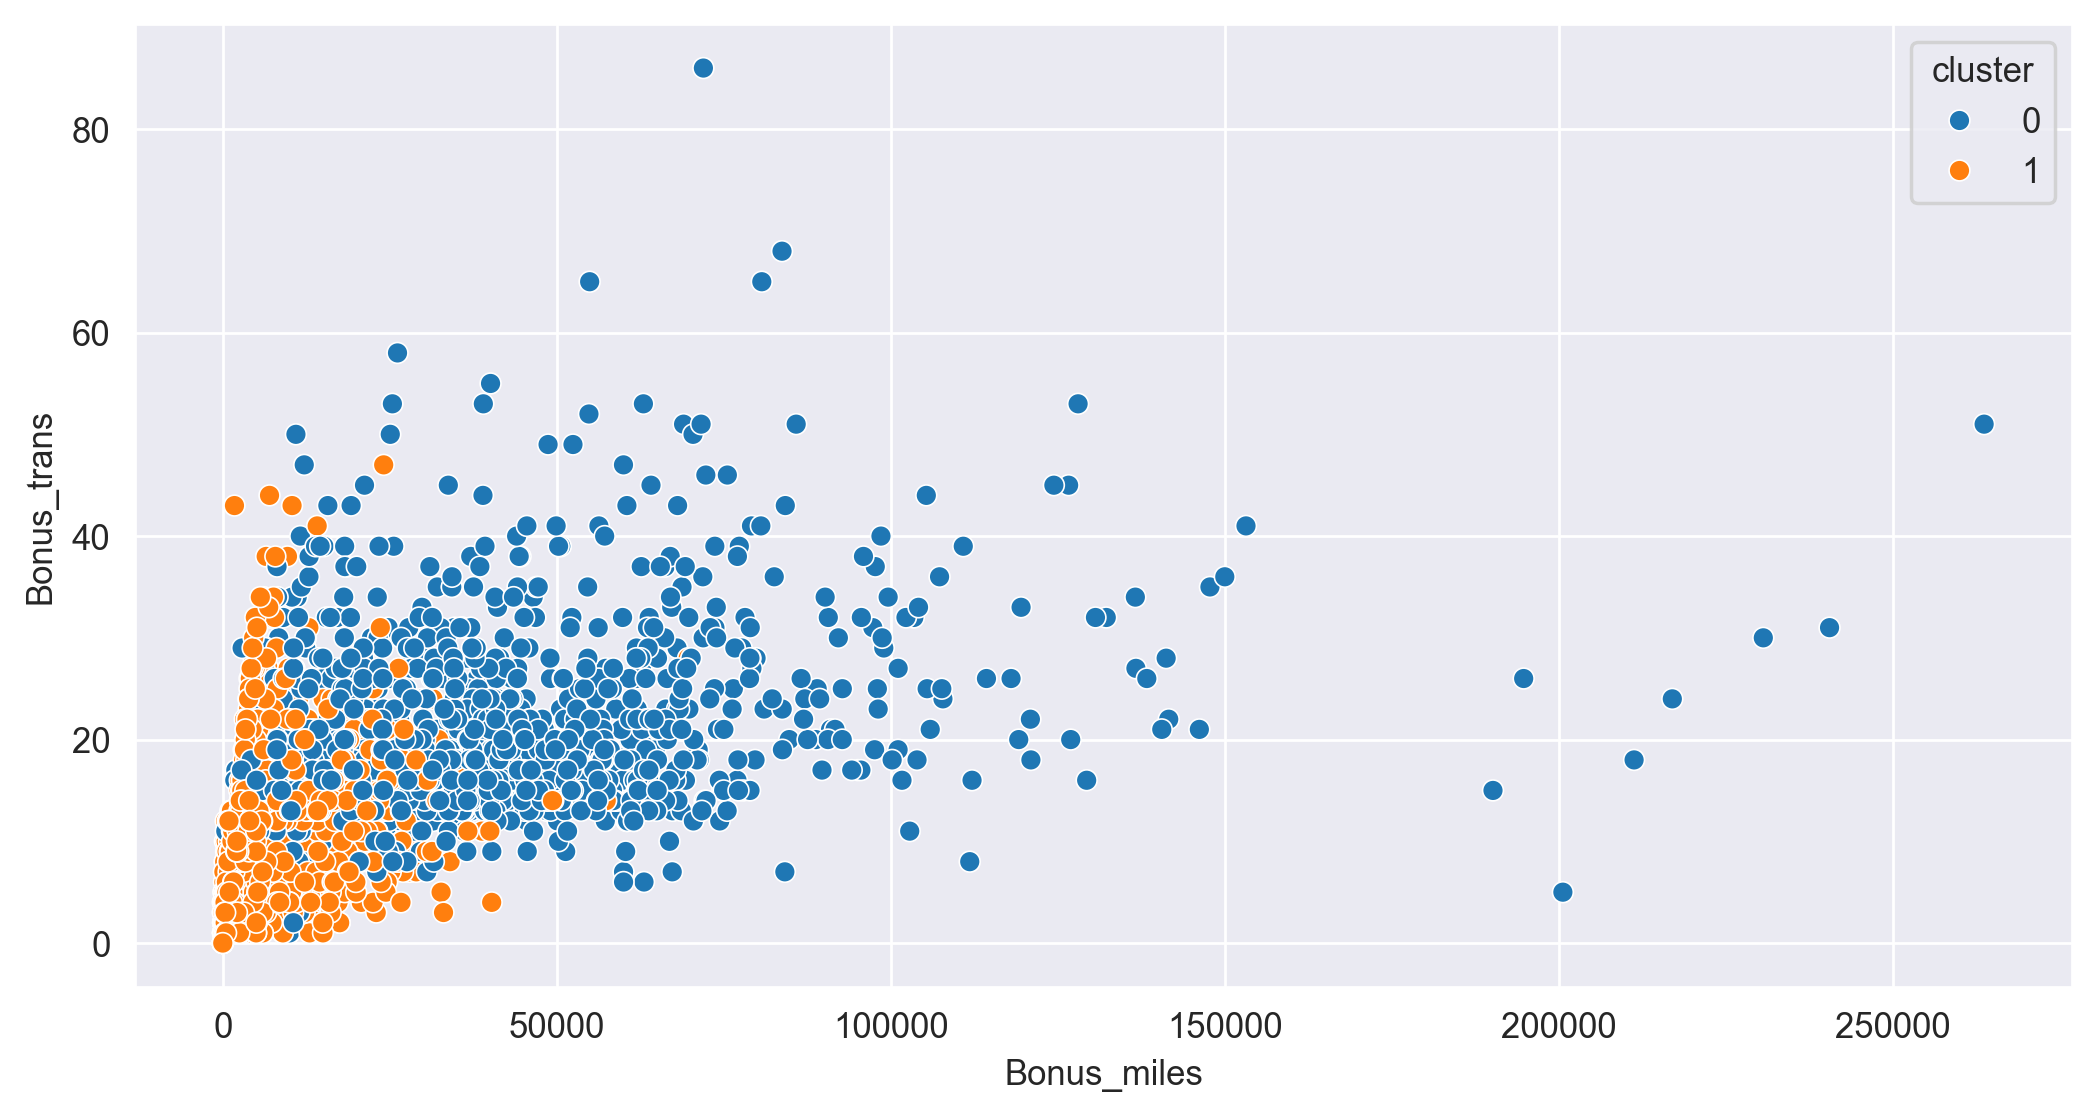

In [23]:
sns.scatterplot(x = df['Bonus_miles'], y = df['Bonus_trans'], hue = df['cluster'])

In [24]:
hc = AgglomerativeClustering(n_clusters=4)     #4 cluster
yp = hc.fit_predict(x)
yp

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [25]:
df = pd.read_excel(r"C:\Users\Admin\Desktop\Clustering\EastWestAirlines.xlsx", sheet_name = 'data')
df['Cluster'] = yp

In [26]:
df.drop(columns=['ID#'], inplace=True)

In [27]:
df.groupby('Cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                               
0        116314.450725  363.839130   3.498551   1.000000   1.035507   
1         46329.336877    9.028618   1.244072   1.000000   1.000000   
2        134880.892308  393.323077   2.430769   1.000000   1.000000   
3         68876.581395   23.255814   1.139535   2.348837   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
0        37150.356522    18.066667         377.000000         1.150000   
1         4868.112428     6.907604         214.812756         0.673753   
2        36582.169231    29.338462        5915.523077        16.638462   
3        14689.837209    17.534884         582.627907         2.209302   

         Days_since_enroll    Award?  
Cluster                               
0              4696.888406  0.663043  
1              3769.337694  0.184383  
2              4599.607692  0.753846  
3              3968.930233  0.395349

In [28]:
df[df['Cluster'] == 2]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
50     108137           0          1          1          1         6368   
65      53914           0          3          1          1        33767   
94     185549           0          5          1          1       110859   
112    124198           0          5          1          1        66330   
121    205126           0          5          1          1       126630   
...       ...         ...        ...        ...        ...          ...   
3907   126490           0          1          1          1         8808   
3911    55922        2273          1          1          1         8104   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   
3950    59650           0          1          1          1         5050   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
50              5               6368                5               6844   
65             45               5550               29               6826   
94             39               2950               16               6778   
112            23               4833               10               7710   
121            45               2250               10               7668   
...           ...                ...              ...                ...   
3907           15               5183               12               1566   
3911           19               4104               16               1552   
3917           37               6349                7               1545   
3934            2               9577                1               1515   
3950           16               3950               13               1476   

      Award?  Cluster  
50         0        2  
65         1        2  
94         1        2  
112        0        2  
121        1        2  
...      ...      ...  
3907       0        2  
3911       0        2  
3917       0        2  
3934       0        2  
3950       0        2  

[130 rows x 12 columns]

In [29]:
df[df['Cluster'] == 1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3993     3974           0          1          1          1          365   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
5               0                  0                0               6942   
...           ...                ...              ...                ...   
3993            3                  0                0               1397   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster  
0          0        1  
1          0        1  
2          0        1  
3          0        1  
5          0        1  
...      ...      ...  
3993       0        1  
3994       1        1  
3995       1        1  
3997       0        1  
3998       0        1  

[2446 rows x 12 columns]

<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

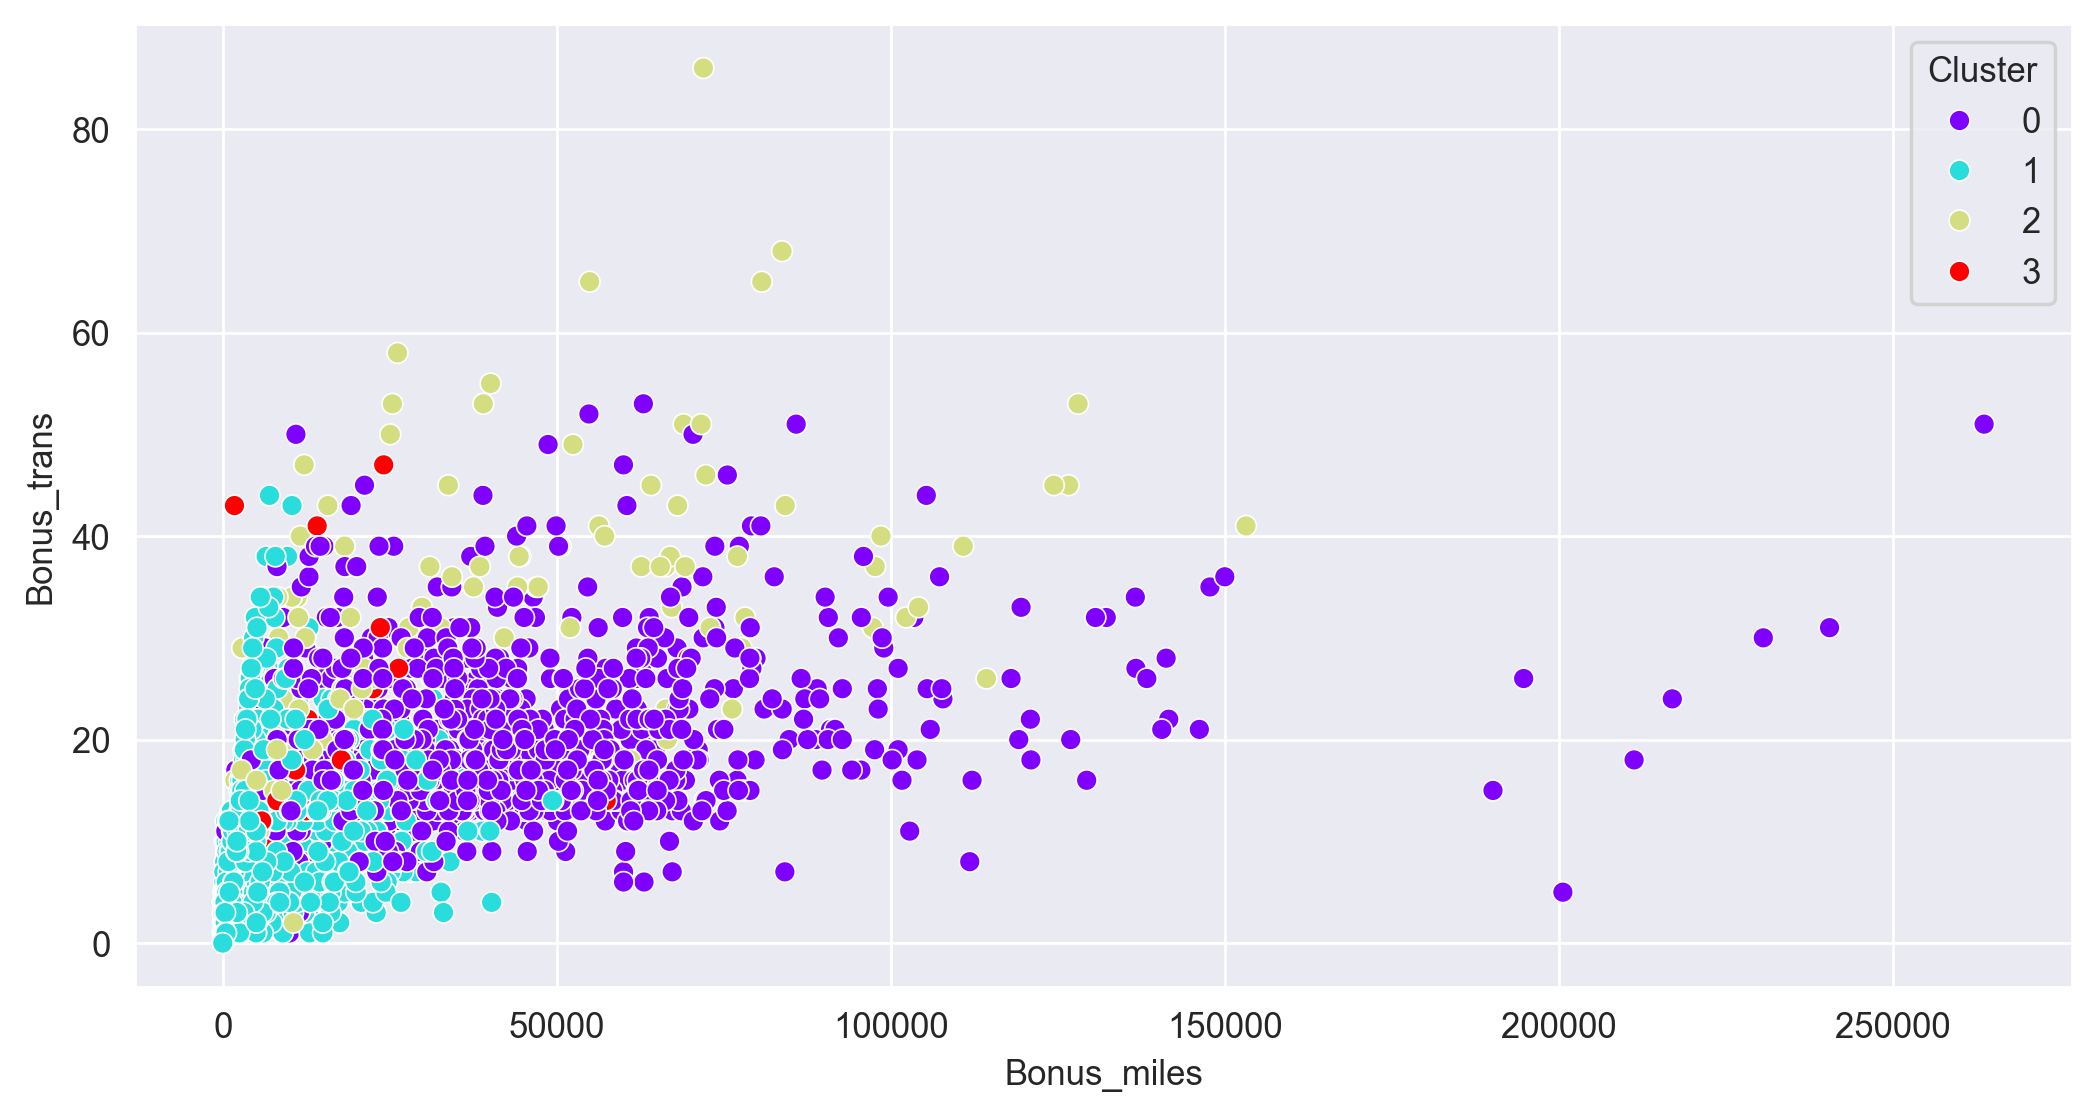

In [30]:
sns.scatterplot(x = df['Bonus_miles'], y = df['Bonus_trans'], hue=df['Cluster'], palette='rainbow')

# K-Means Clustering

<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

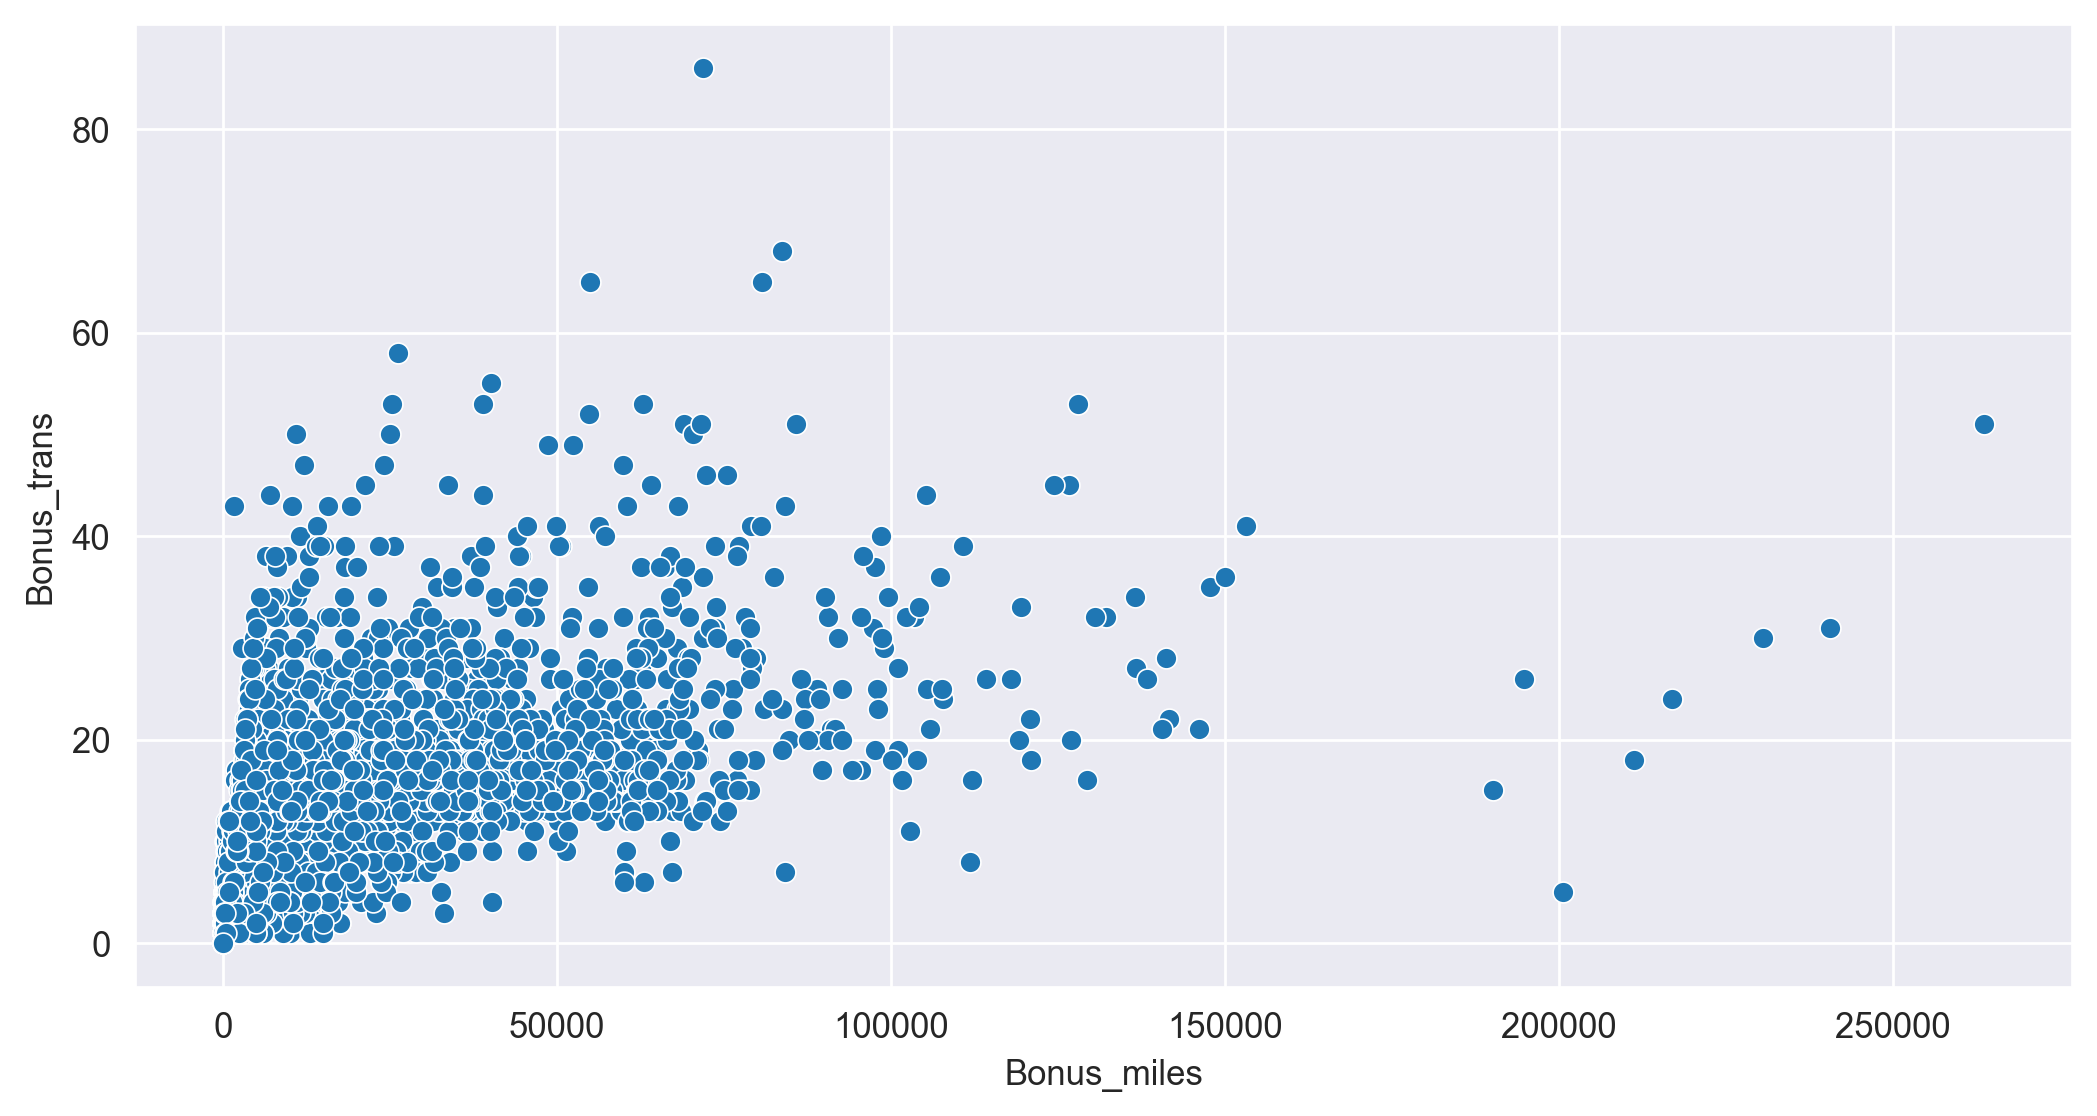

In [31]:
sns.scatterplot(x = df['Bonus_miles'], y = df['Bonus_trans'])

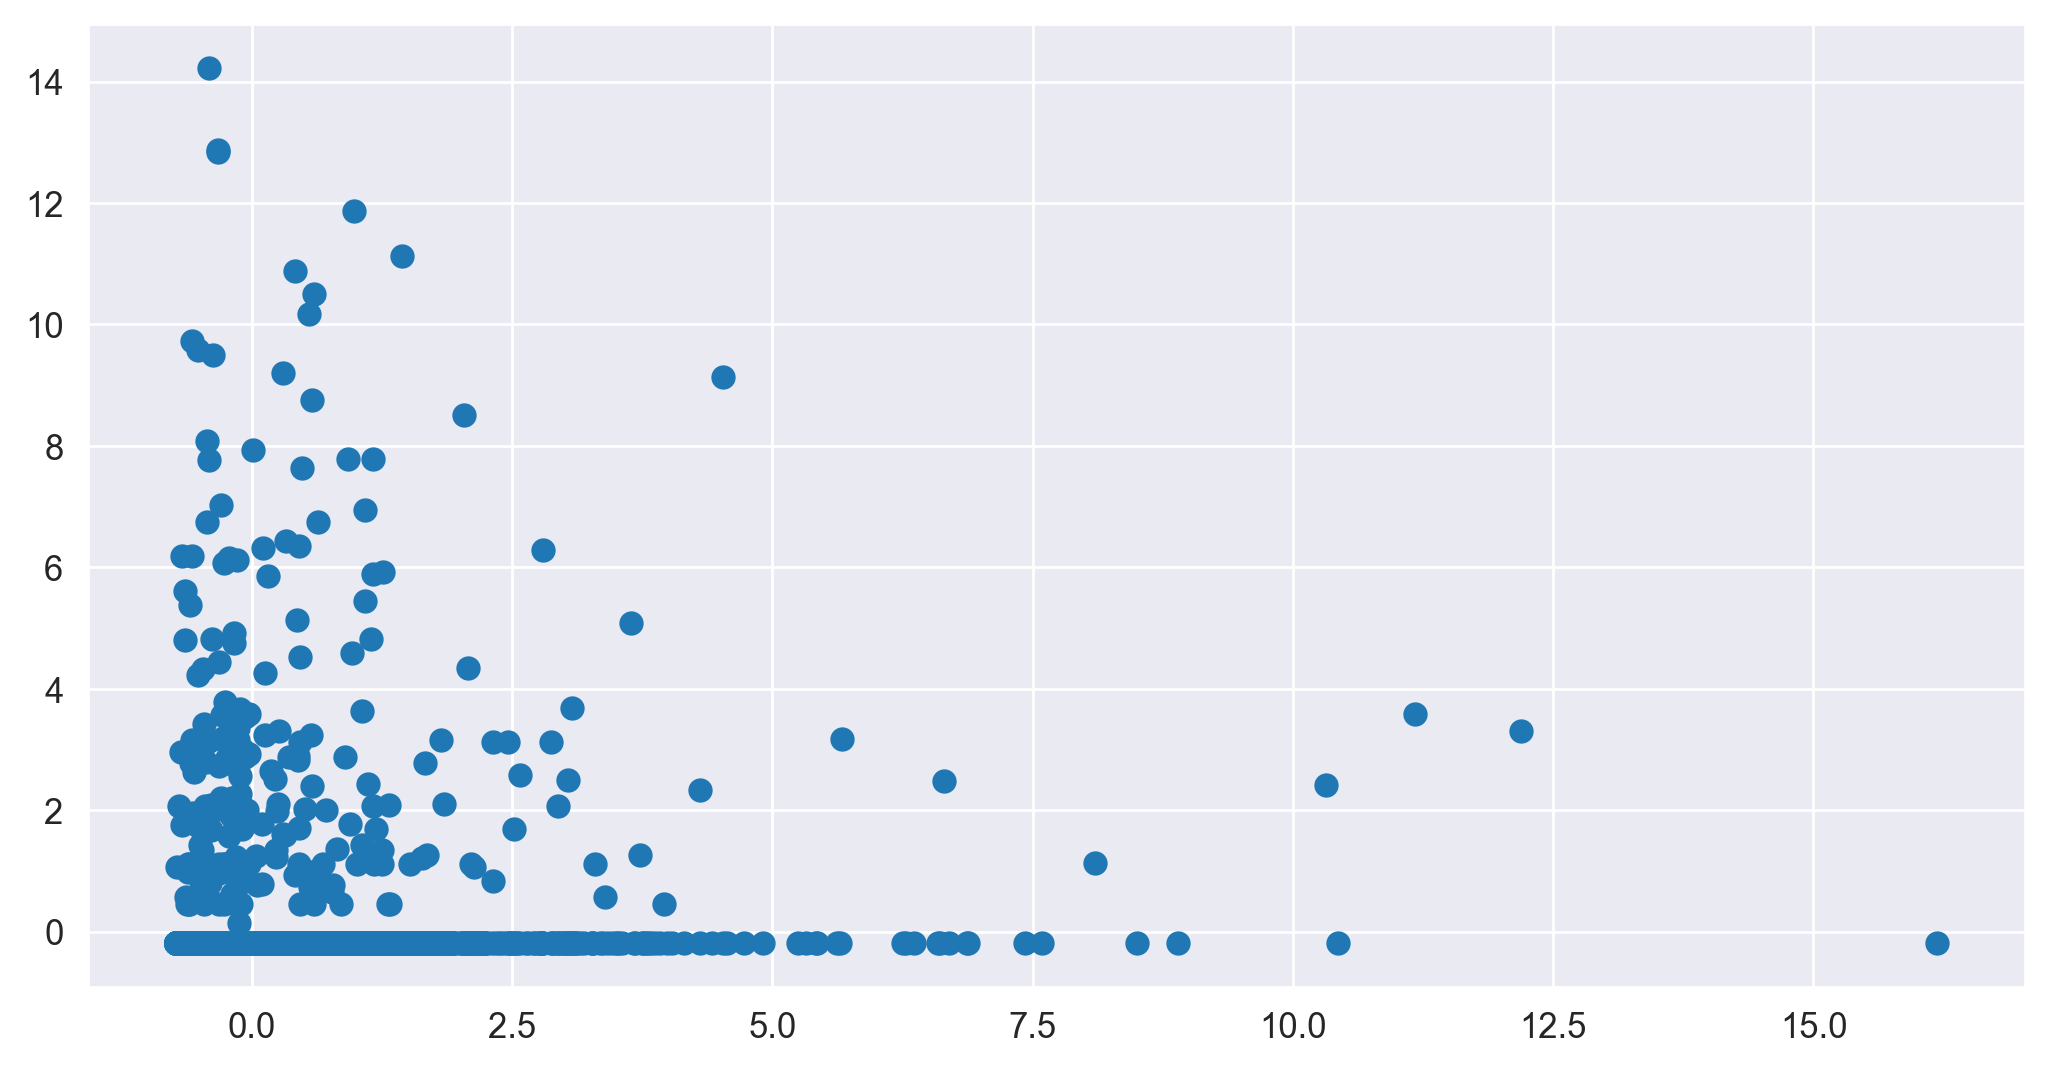

In [32]:
plt.scatter(x[:,0],x[:,1])

In [33]:
from sklearn.cluster import KMeans  #model building

In [34]:
!pip install threadpoolctl==3.1.0

In [35]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([1, 1, 1, ..., 2, 1, 1])

In [36]:
km.cluster_centers_    #cluster centre

array([[ 0.27269839, -0.1540892 ,  0.78558112, -0.09824189, -0.04845786,
         0.3377452 ,  0.58920193, -0.21029808, -0.2358593 ,  0.18730847,
        -0.7669193 ],
       [-0.35699446, -0.1378474 , -0.73773048, -0.09824189, -0.06276658,
        -0.59809548, -0.68958659, -0.19213246, -0.2103013 , -0.27092415,
        -0.43777274],
       [-0.03472348, -0.07539677,  0.72657098, -0.09824189, -0.05698495,
         0.47780473,  0.54780964, -0.02168877, -0.01577337,  0.29300252,
         1.30391816],
       [ 0.56442946,  0.40998839, -0.0582049 , -0.09824189, -0.06276658,
         0.48063887,  1.81395673,  4.54737521,  4.66104932,  0.08632223,
         0.85559252],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.4436803 ,  6.91325738, -0.03070535, -0.09824189, -0.06276658,
         0.07551146,  0.07018525,  0.35385549,  0.40609604, -0.10058584,
         0.339

In [37]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [38]:
x[:,0]

array([-4.51140783e-01, -5.39456874e-01, -3.20031232e-01, ...,
       -4.29480975e-05, -1.85606976e-01, -7.00507951e-01])

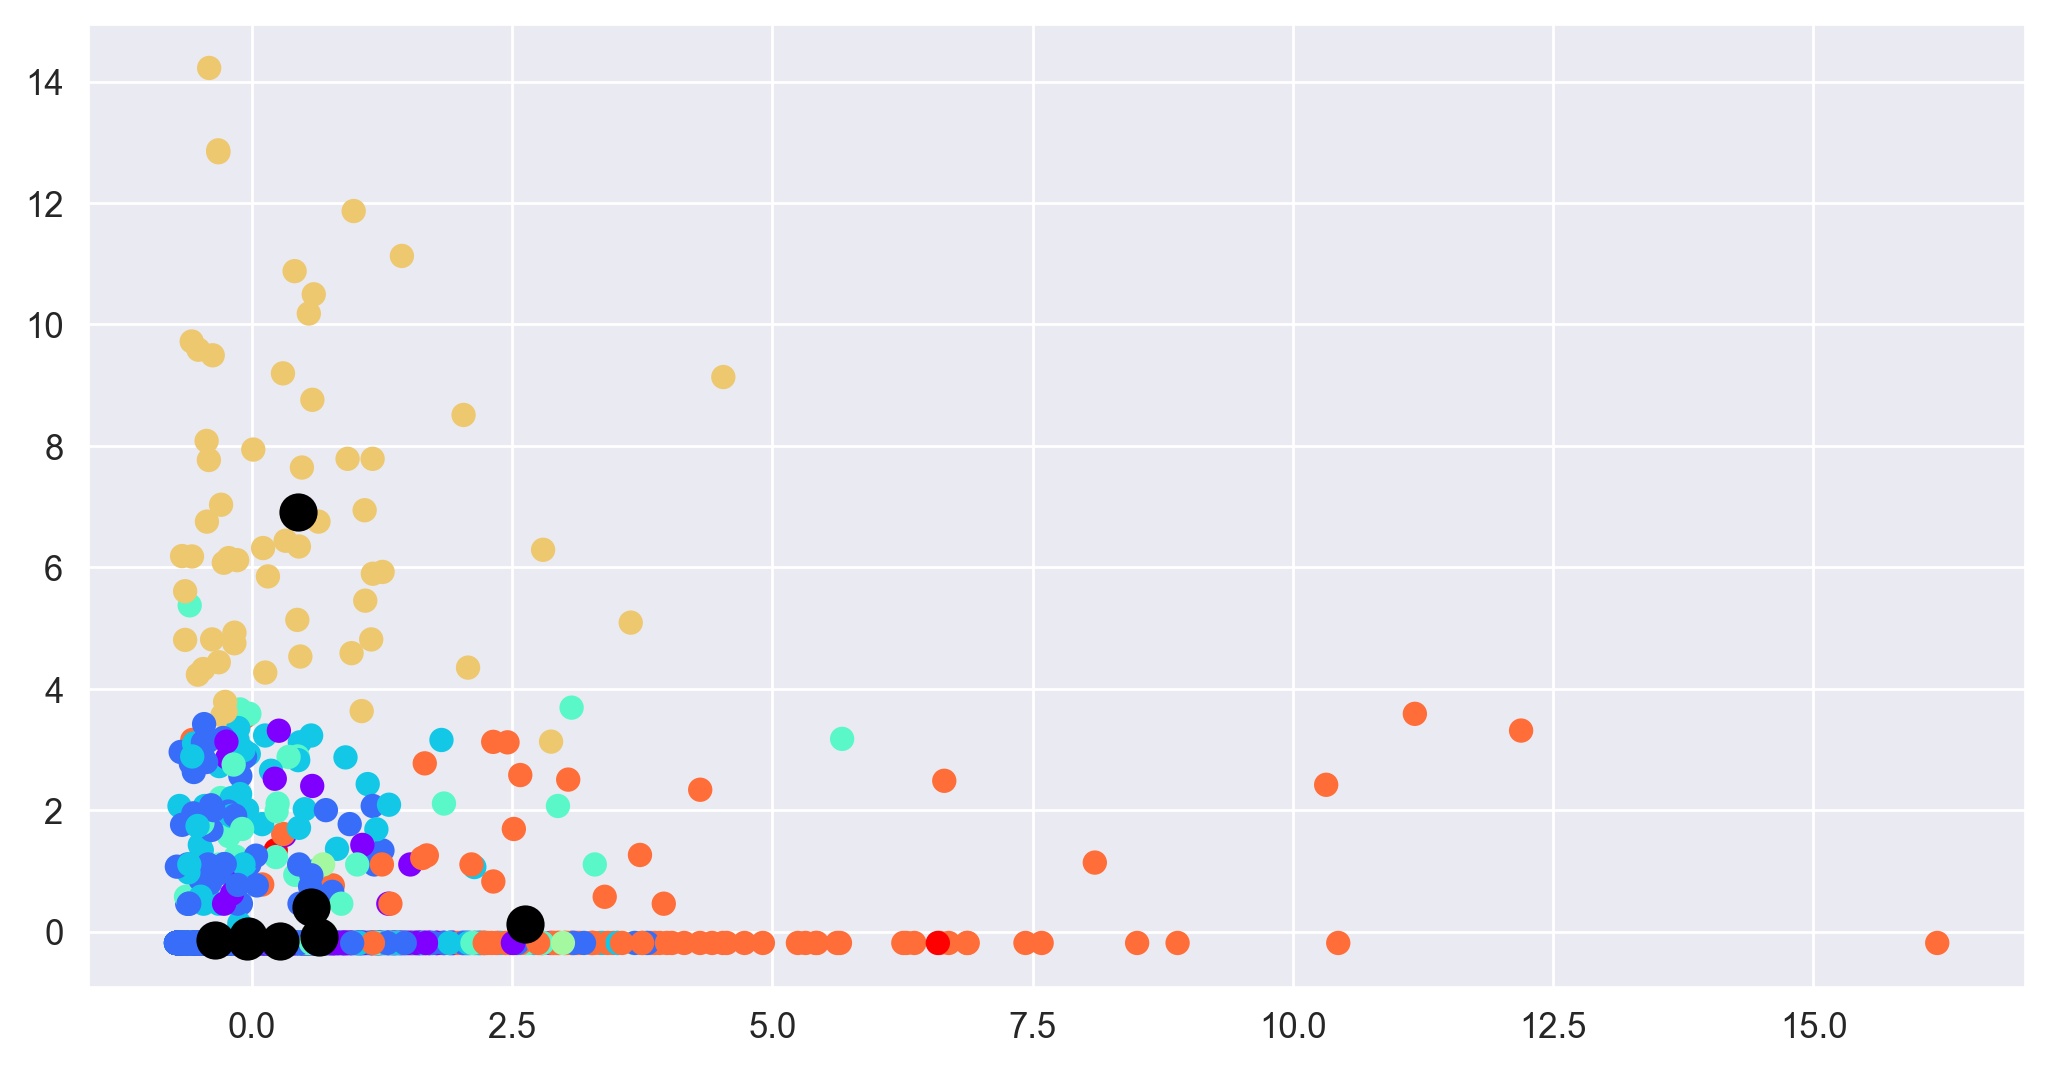

In [39]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')                                           #c=yp for diff colour coding
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'black', s = 100) 

In [40]:
wcss = []                   #Elbow graph

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [41]:
wcss

[43988.99999999999,
 35409.61927448697,
 33326.85839326836,
 29404.288571729885,
 25827.758090064643,
 21475.13531478648,
 21028.310829842652,
 17371.457379189742,
 16043.228077658627,
 15183.170331480116]

Text(0.5, 1.0, 'Elbow Graph')

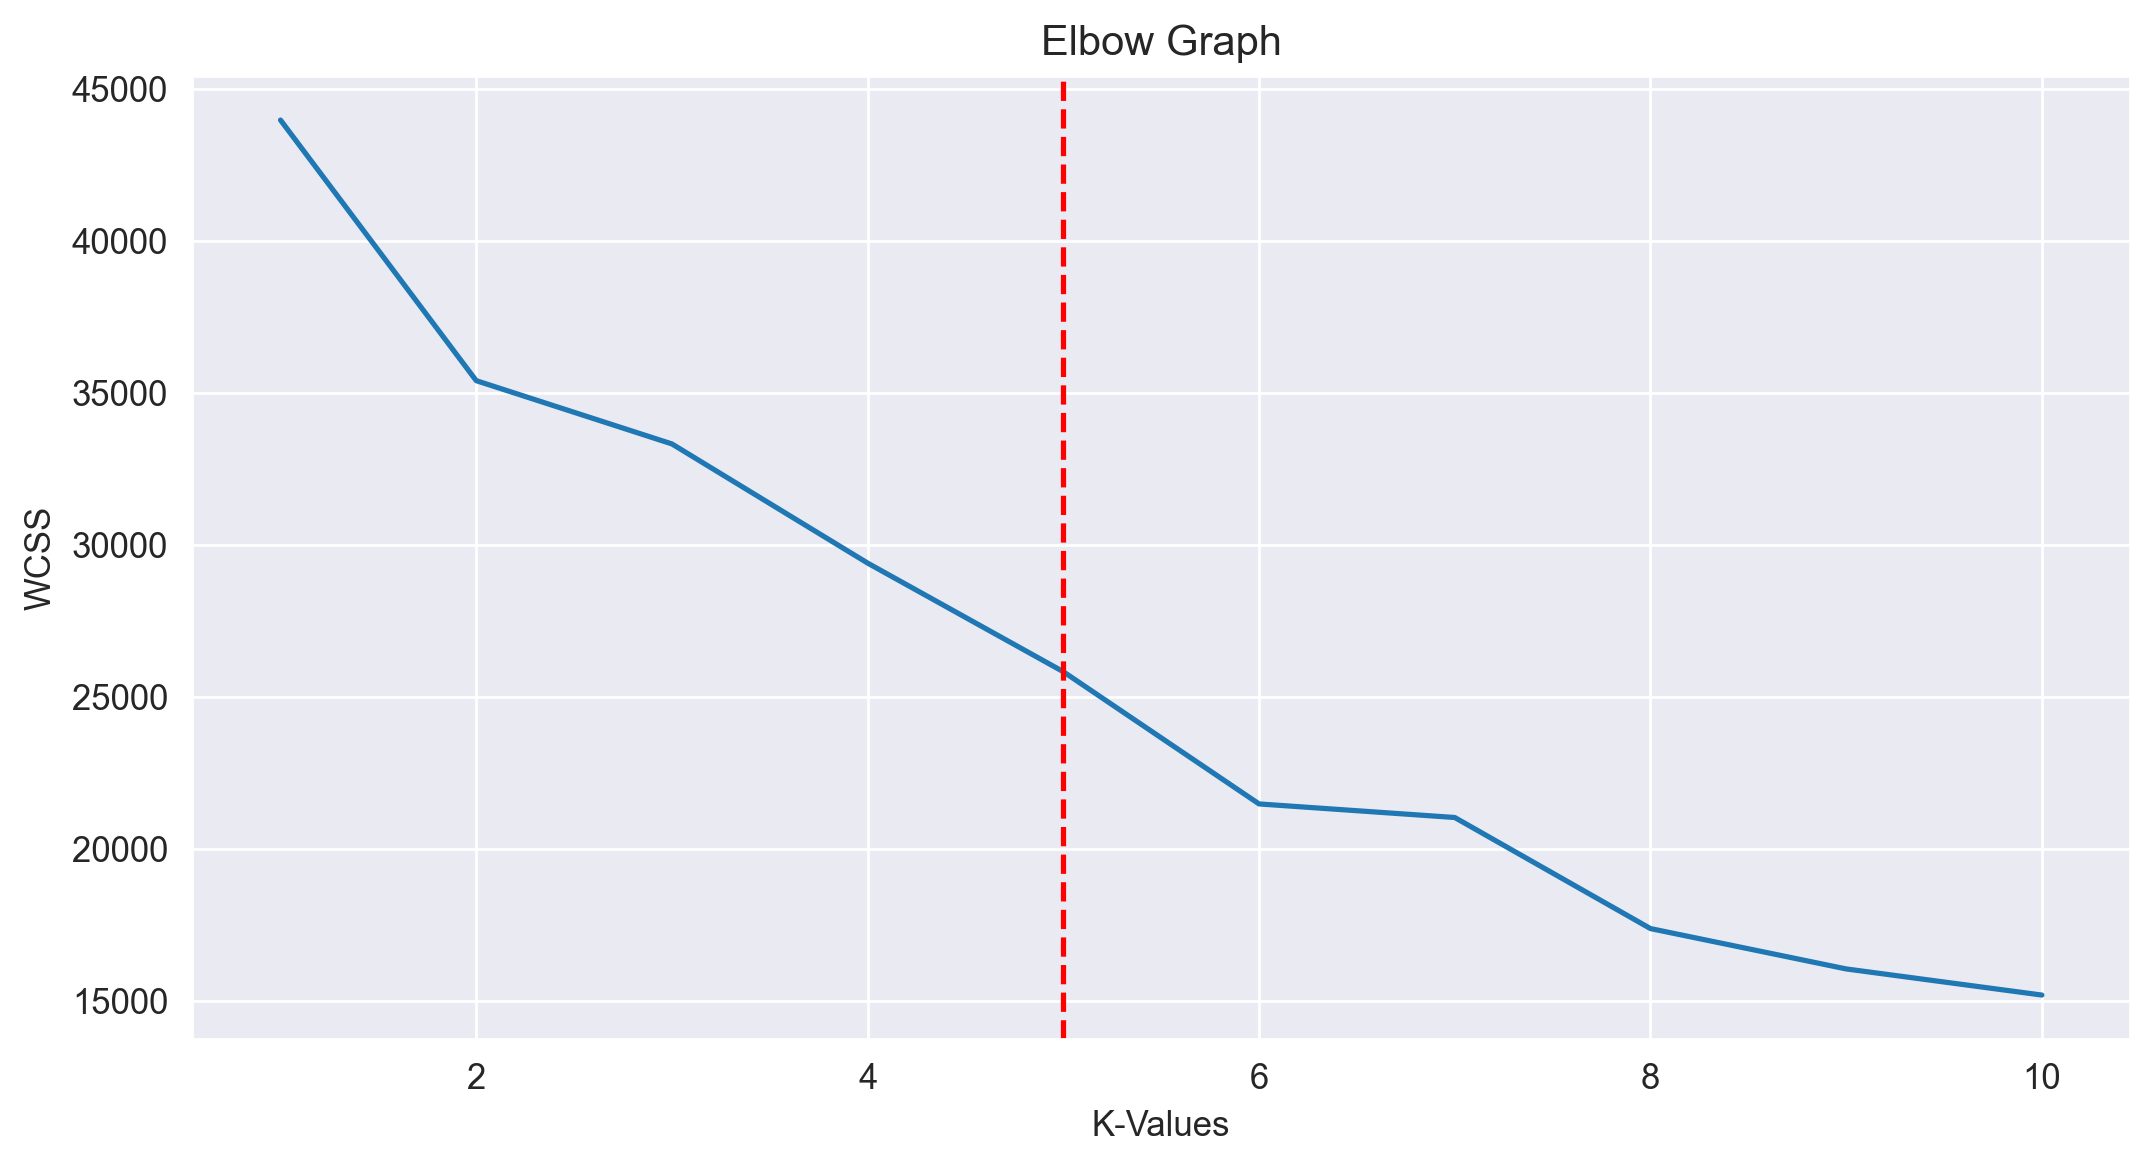

In [42]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')                         #axvline for verticle line and axhline for hozrizontal line
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [43]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, ..., 4, 1, 1])

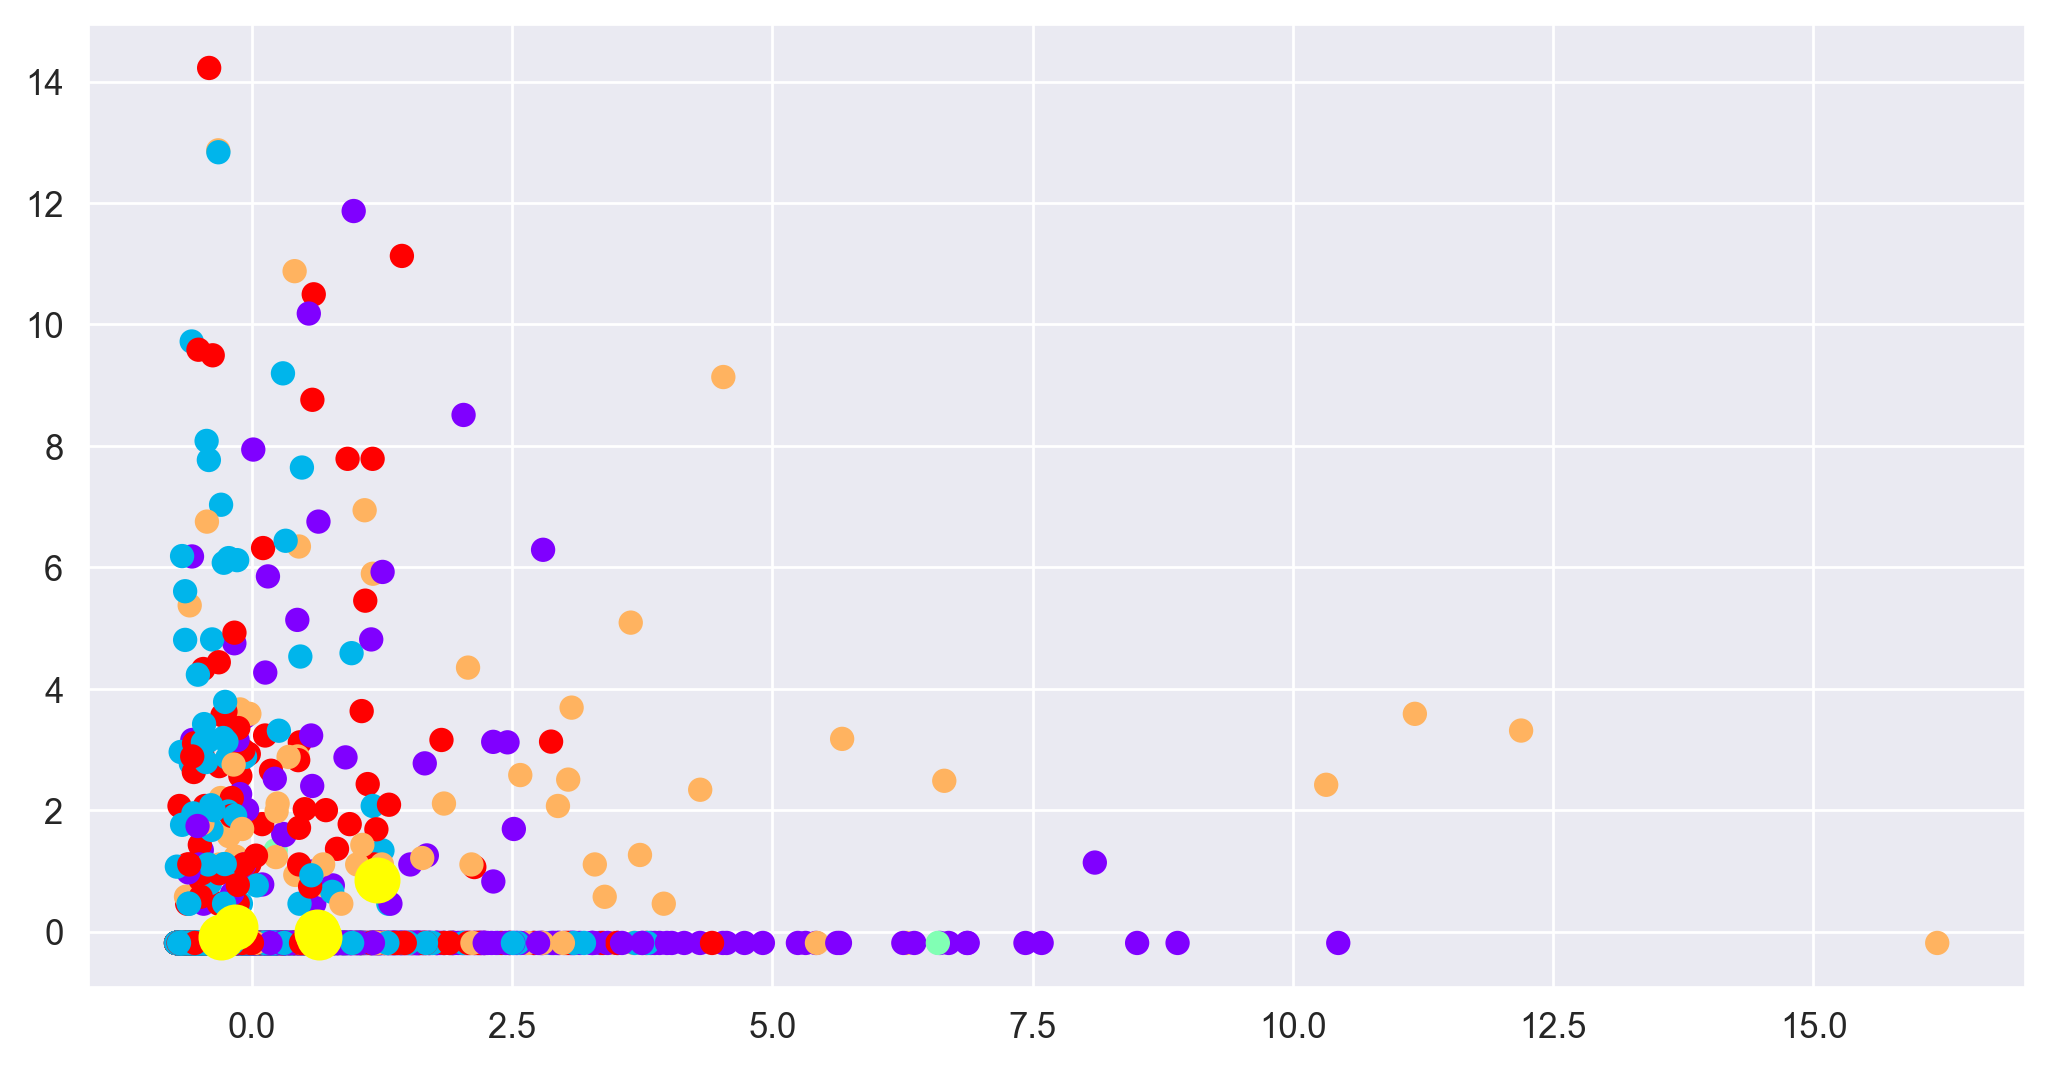

In [44]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')                                        #visualize the cluster
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 150)

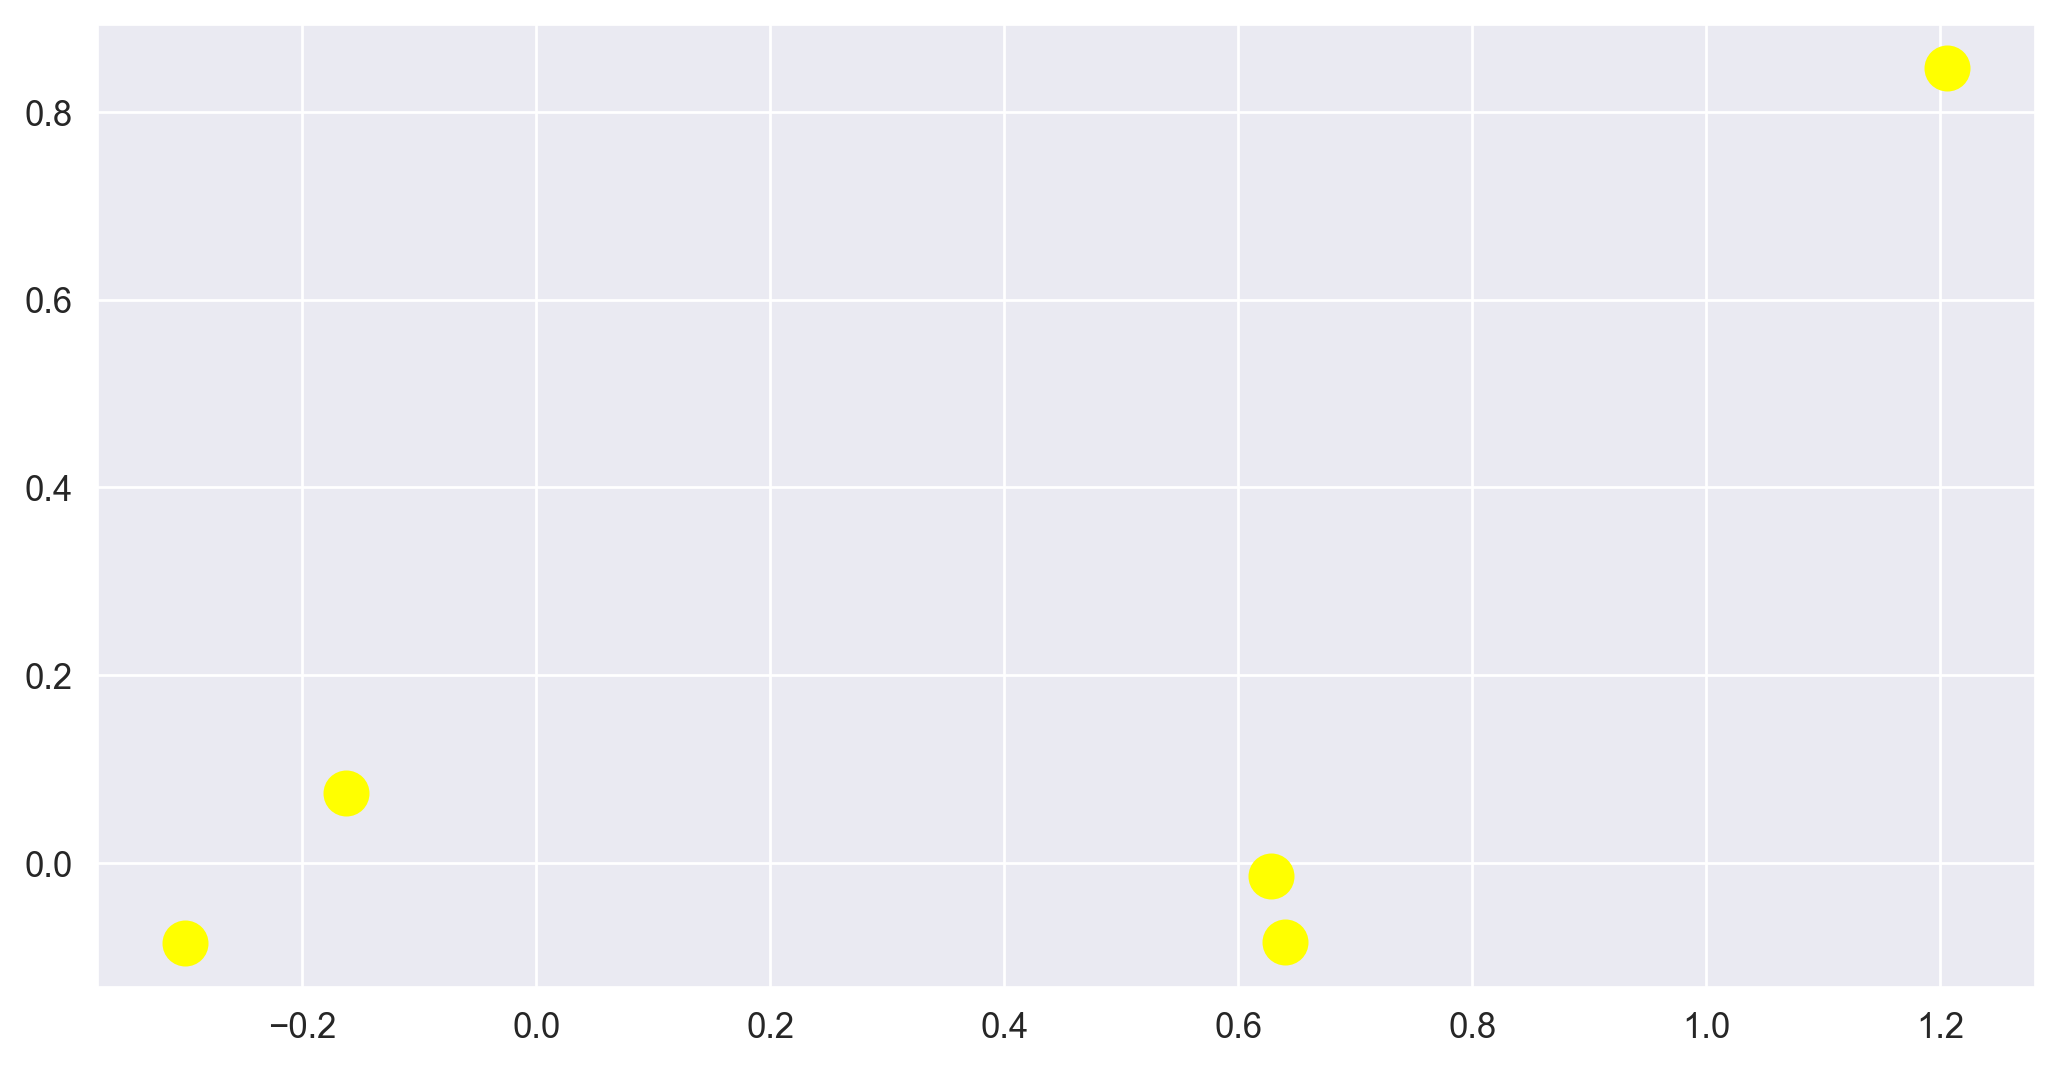

In [45]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 150)

In [54]:
silhouette_score(x,ypred)

NameError: name 'silhouette_score' is not defined

In [52]:
df['cluster'] = ypred                 #Analyzing clusters
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster  cluster  
0          0        1        1  
1          0        1        1  
2          0        1        1  
3          0        1        1  
4          1        0        0  
...      ...      ...      ...  
3994       1        1        4  
3995       1        1        4  
3996       1        0        4  
3997       0        1        1  
3998       0        1        1  

[3999 rows x 13 columns]

In [ ]:
df.groupby('cluster').agg('mean') 

# DBSCAN

In [55]:
from sklearn.cluster import DBSCAN  

In [57]:
db = DBSCAN(eps=0.5, min_samples=3)            #eps is radius

y = db.fit_predict(x)
y

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

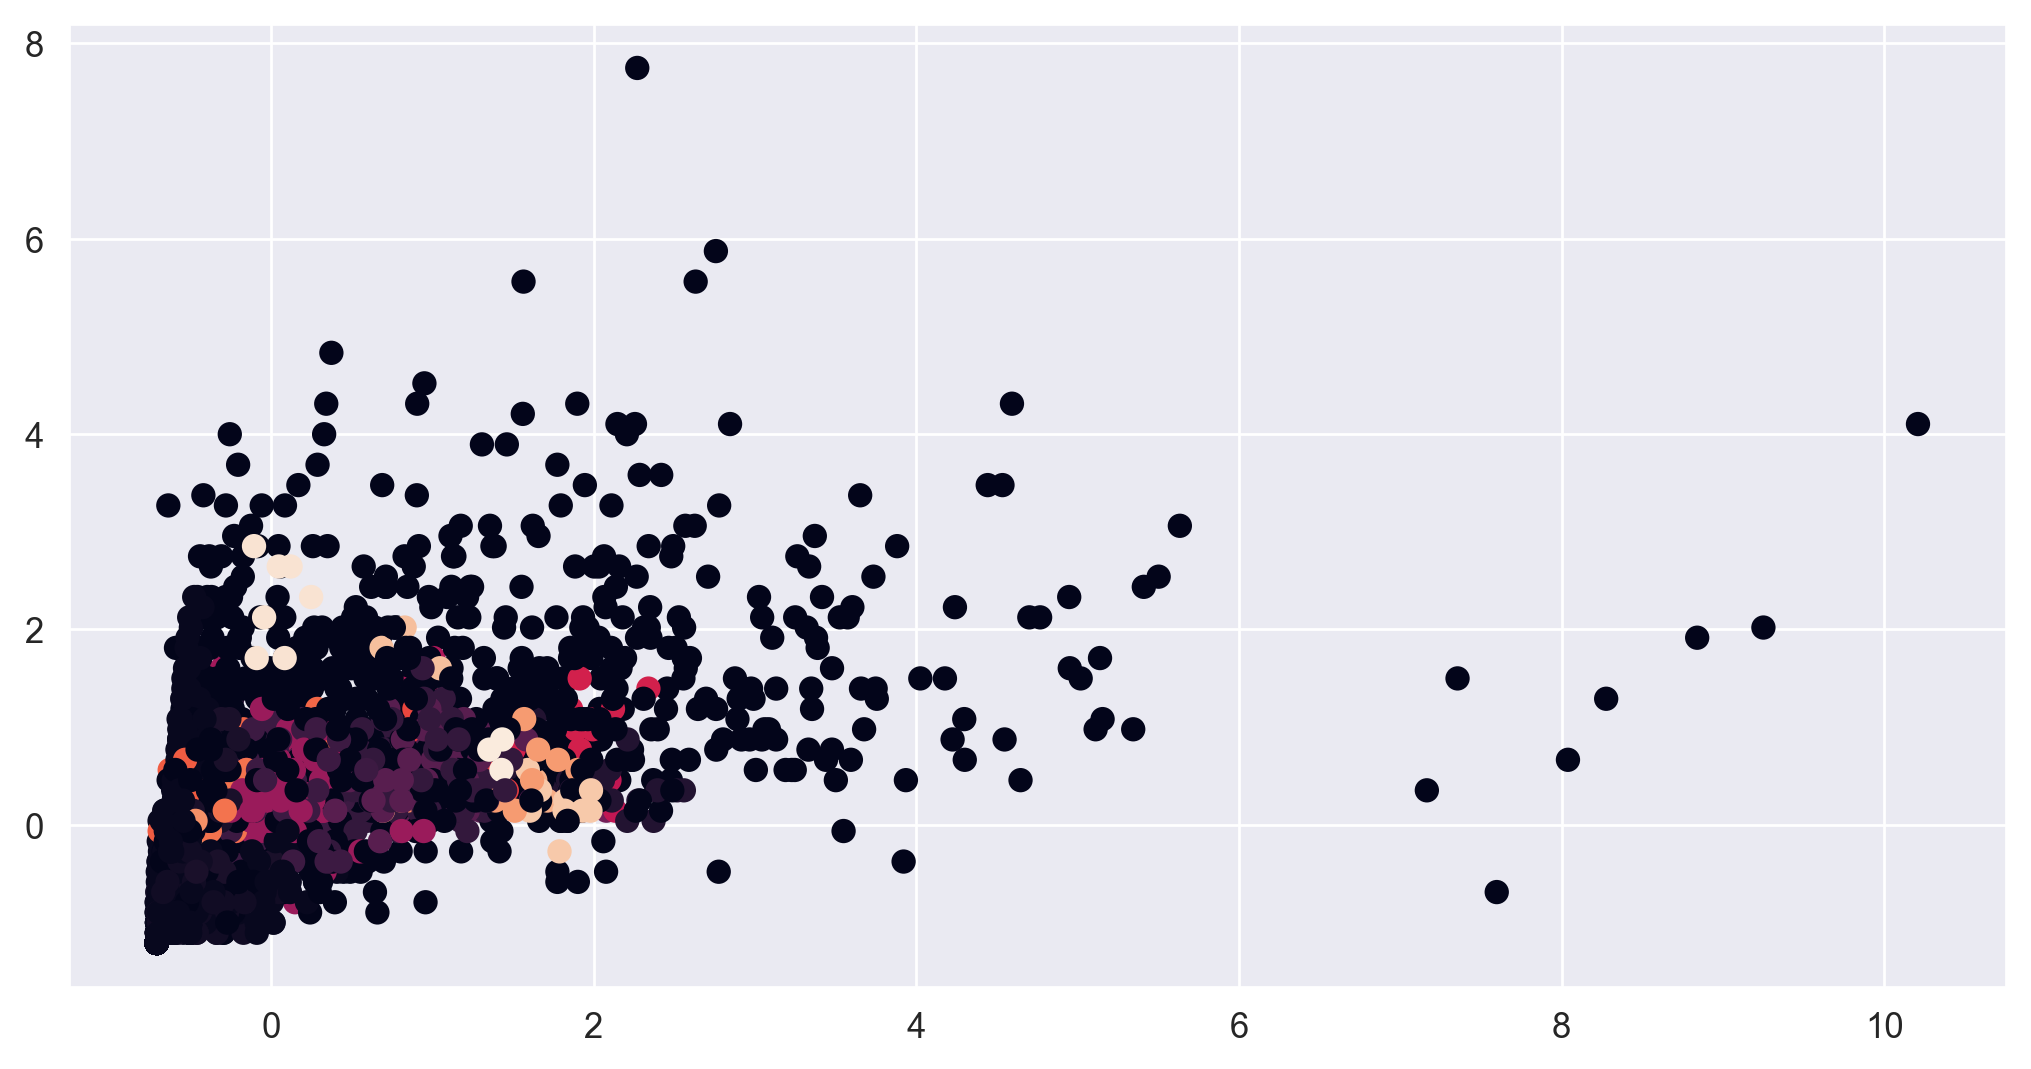

In [58]:
plt.scatter(x[:,5],x[:,6],c = y)

In [59]:
silhouette_score(x,y)

NameError: name 'silhouette_score' is not defined

In [60]:
from sklearn.neighbors import NearestNeighbors   

In [62]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [63]:
d,index = neigh.kneighbors(x)

In [64]:
d

array([[0.        , 0.11184685, 0.12034246],
       [0.        , 0.11406276, 0.11437601],
       [0.        , 0.16540223, 0.19458949],
       ...,
       [0.        , 0.16614779, 0.28024323],
       [0.        , 0.25725534, 0.27167409],
       [0.        , 0.00270574, 0.0112955 ]])

In [65]:
distance = np.sort(d[:,1])
distance

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0.5, 1.0, 'K-Distance Graph')

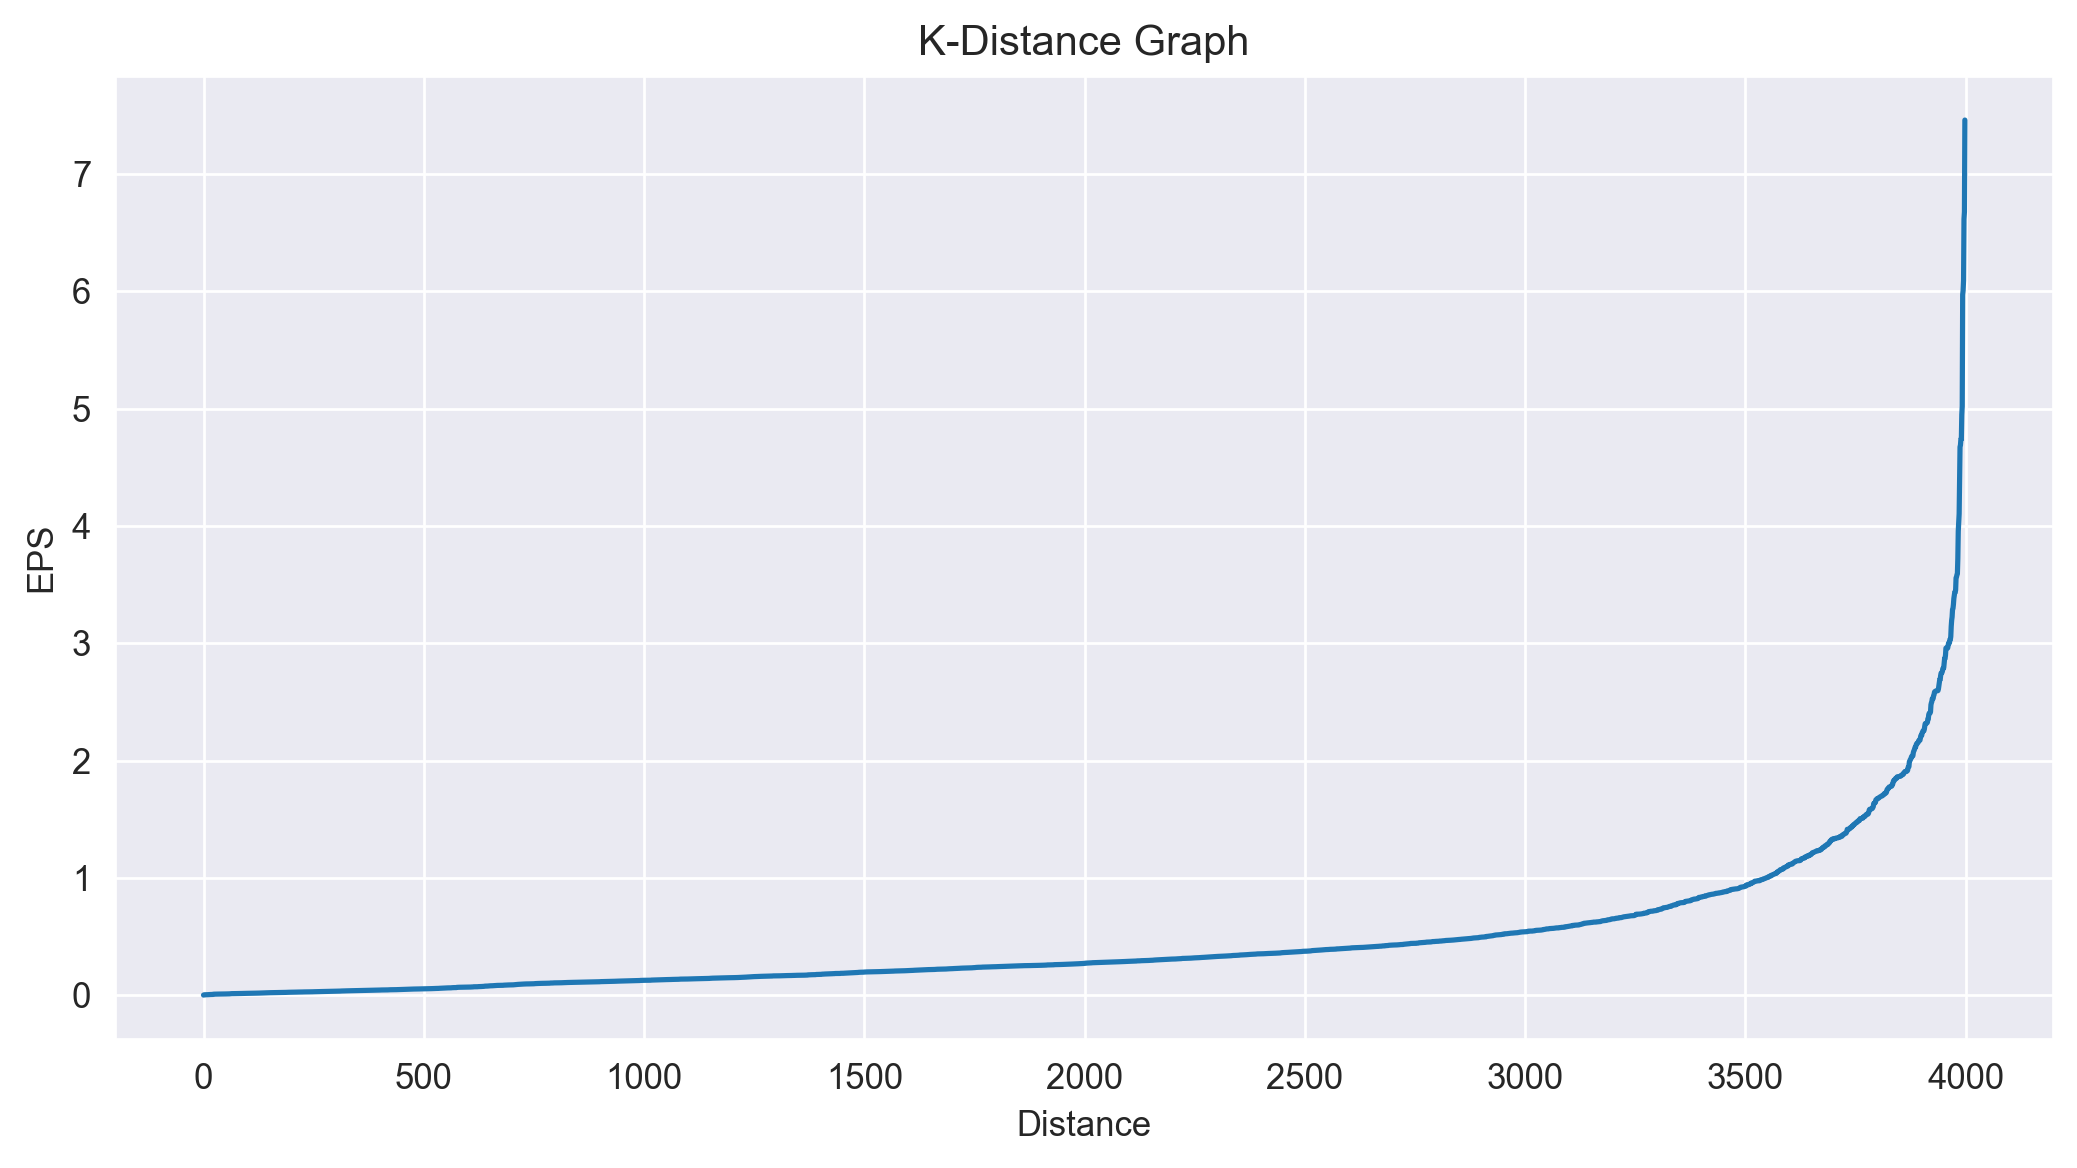

In [66]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [67]:
db = DBSCAN(eps=2,min_samples=3)           #we take eps value from k distance graph 
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

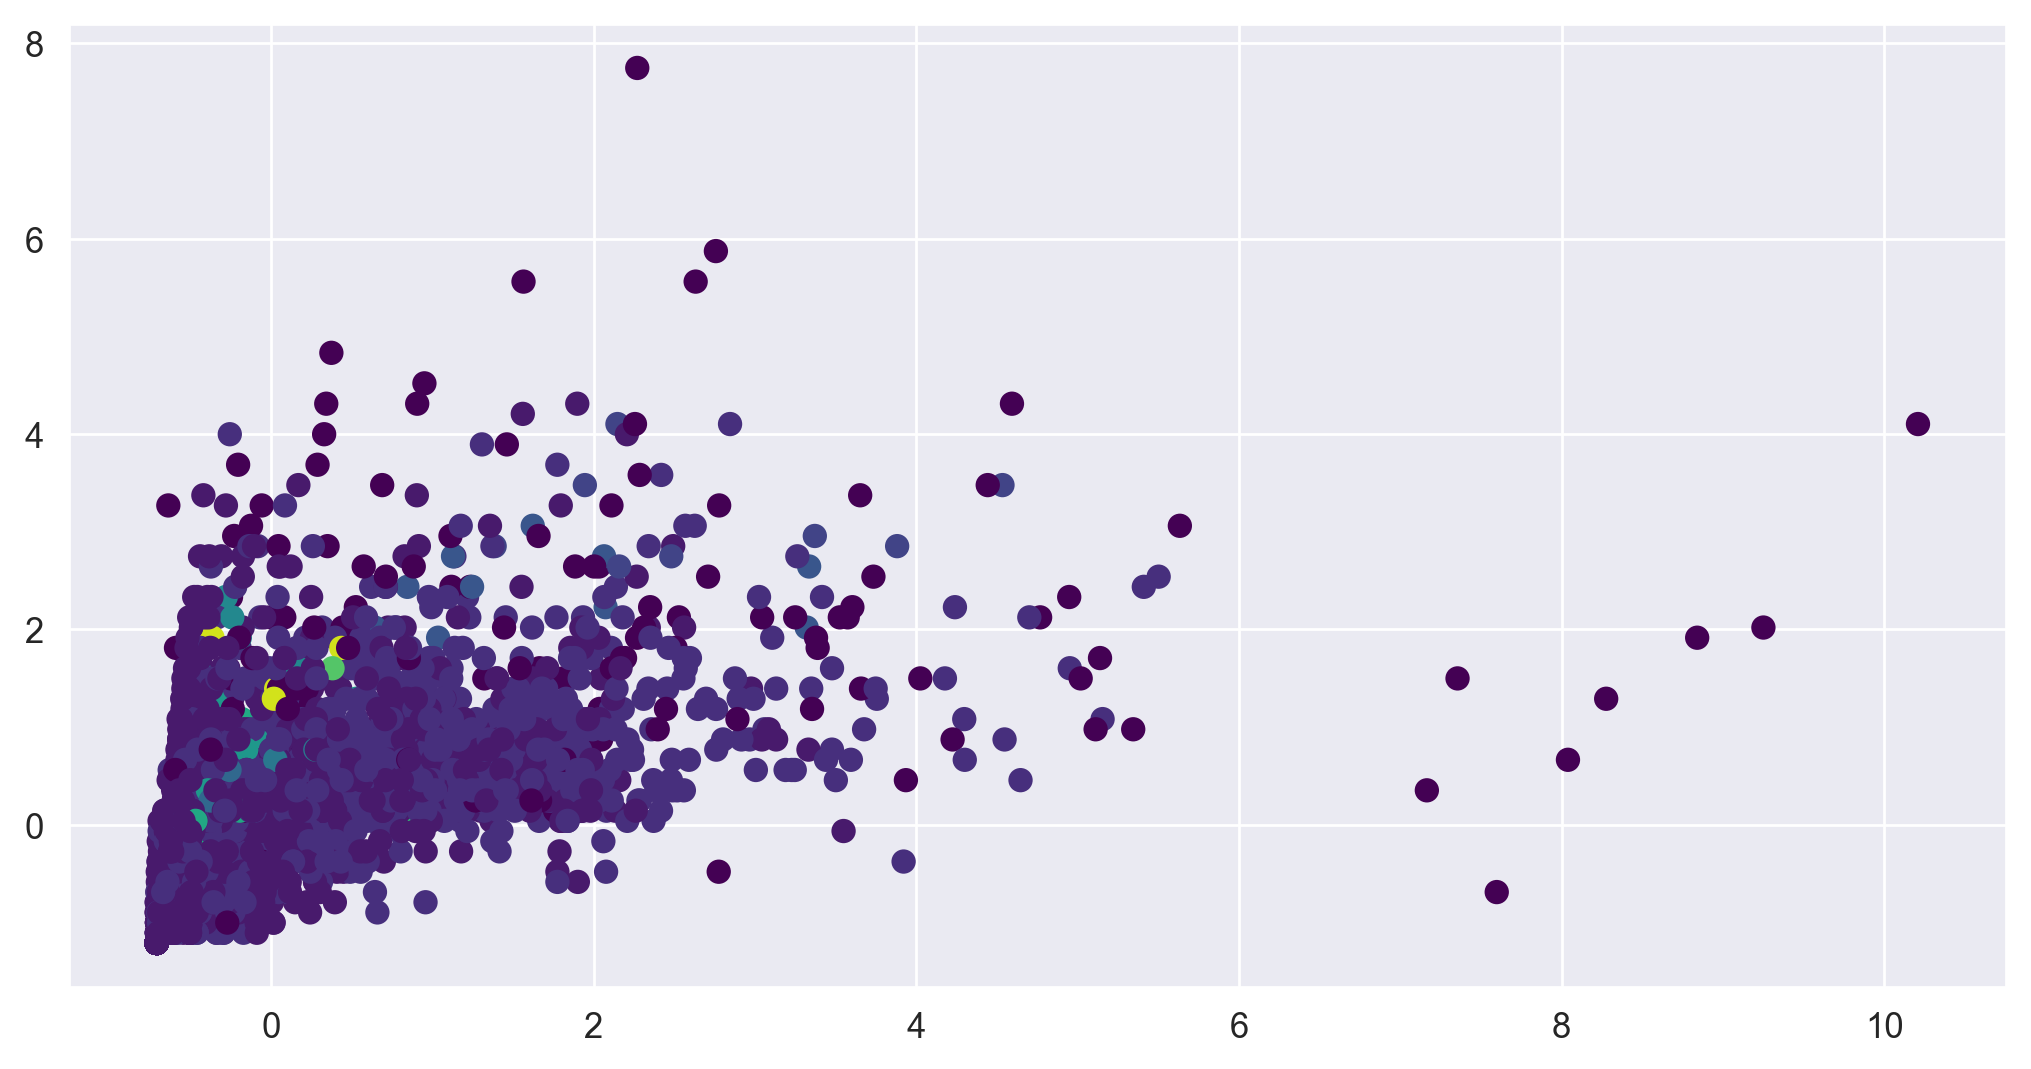

In [68]:
plt.scatter(x[:,5],x[:,6],c = yp, cmap='viridis')

In [70]:
silhouette_score(x,yp)

NameError: name 'silhouette_score' is not defined

In [71]:
df['Cluster'] = yp      #analyze cluster
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster  cluster  
0          0        0        1  
1          0        0        1  
2          0        0        1  
3          0        0        1  
4          1        1        0  
...      ...      ...      ...  
3994       1        1        4  
3995       1        1        4  
3996       1        1        4  
3997       0        0        1  
3998       0        0        1  

[3999 rows x 13 columns]

In [72]:
df[df['Cluster'] == -1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
50     108137           0          1          1          1         6368   
65      53914           0          3          1          1        33767   
70      84409        5031          2          1          1        15436   
87     609477           0          3          1          1        21422   
...       ...         ...        ...        ...        ...          ...   
3846    97510        1678          5          1          1        71609   
3883   126167           0          5          1          1       190160   
3911    55922        2273          1          1          1         8104   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
50              5               6368                5               6844   
65             45               5550               29               6826   
70             16               1150                4               7766   
87             22               1200                8               6820   
...           ...                ...              ...                ...   
3846           51               7650               26               1665   
3883           15                  0                0               1612   
3911           19               4104               16               1552   
3917           37               6349                7               1545   
3934            2               9577                1               1515   

      Award?  Cluster  cluster  
8          1       -1        3  
50         0       -1        3  
65         1       -1        3  
70         0       -1        4  
87         0       -1        0  
...      ...      ...      ...  
3846       1       -1        3  
3883       1       -1        0  
3911       0       -1        3  
3917       0       -1        3  
3934       0       -1        3  

[155 rows x 13 columns]

In [73]:
df.groupby('Cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                                
-1       260420.109677  1594.935484   2.961290   1.058065   1.316129   
 0        57907.307379    62.809621   1.696290   1.000000   1.000000   
 1        79309.132975   101.849347   2.656418   1.000000   1.000000   
 2       127518.000000     0.000000   4.500000   1.000000   1.000000   
 3       102407.500000    73.300000   4.100000   1.000000   1.000000   
 4        40618.000000     0.000000   1.000000   2.000000   1.000000   
 5        51096.000000     0.000000   1.000000   3.000000   1.000000   
 6        73323.400000   117.800000   1.000000   1.000000   1.000000   
 7        68348.214286   856.142857   1.071429   1.000000   1.000000   
 8        39218.500000     0.000000   1.000000   2.000000   1.000000   
 9        52906.000000  4062.333333   4.333333   1.000000   1.000000   
 10       20111.500000     0.000000   1.000000   3.000000   1.000000   
 11      106247.500000   273.500000   1.000000   1.000000   1.000000   
 12      781291.333333     0.000000   1.000000   1.000000   1.000000   
 13      164878.000000     0.000000   1.000000   1.000000   1.000000   
 14      110616.000000  5310.666667   1.000000   1.000000   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
-1       56274.954839    27.561290        3948.883871        10.670968   
 0        9788.411741     8.909906         190.066857         0.561761   
 1       25814.836280    14.112221         408.066872         1.277479   
 2       83250.625000    41.750000        2823.625000        10.125000   
 3       58941.800000    34.900000        4737.800000        15.700000   
 4        8444.142857    14.285714         250.000000         0.714286   
 5       15561.666667    14.333333          44.444444         0.222222   
 6       12311.200000    30.000000        3734.600000        24.800000   
 7       11950.285714    18.071429        4263.571429        13.857143   
 8        9189.250000    13.500000         209.375000         0.812500   
 9       54419.000000    15.666667         366.666667         1.000000   
 10      18085.500000    20.000000         950.000000         2.500000   
 11       8641.000000    19.250000        6991.000000        18.000000   
 12      17995.000000     8.666667         723.333333         2.000000   
 13      17867.500000    27.000000        7655.000000        25.000000   
 14       5817.666667    13.000000        3691.000000        10.666667   

         Days_since_enroll    Award?   cluster  
Cluster                                         
-1             4876.838710  0.767742  2.206452  
 0             3816.035059  0.000000  0.864656  
 1             4565.135281  1.000000  2.481168  
 2             4873.000000  1.000000  1.125000  
 3             6392.900000  1.000000  3.000000  
 4             4612.285714  1.000000  4.000000  
 5             3603.444444  0.000000  1.000000  
 6             4324.800000  1.000000  3.000000  
 7             4496.500000  1.000000  3.000000  
 8             3511.187500  0.000000  1.000000  
 9             5946.666667  1.000000  0.000000  
 10            5325.750000  1.000000  4.000000  
 11            5112.000000  0.000000  3.000000  
 12            6071.000000  1.000000  0.000000  
 13            3707.250000  1.000000  3.000000  
 14            4405.666667  1.000000  3.000000